## All model comparison

In [1]:

import os

import sys

module_path = os.path.abspath(os.path.join('..'))

print(module_path)

if module_path not in sys.path:

    sys.path.append(module_path)
from hate_speech_detection.models import models
from hate_speech_detection.util import confusionMatrixAndAccuracyReport

g:\MTechClasses\MTP\Codes\CodeMixed3L


c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
01/02/2024 09:34:42 - INFO - happytransformer.happy_transformer -   Using model: cpu
01/02/2024 09:34:45 - INFO - happytransformer.happy_transformer -   Using model: cpu
01/02/2024 09:34:50 - INFO - happytransformer.happy_transformer -   Using model: cpu
01/02/2024 09:35:07 - INFO - happytransformer.happy_transformer -   Using model: cpu
01/02/2024 09:35:23 - INFO - happytransformer.happy_transformer -   Using model: cpu
01/02/2024 09:36:31 - INFO - happytransformer.happy_transformer -   Using model: cpu


### Loading Test Data

In [2]:
import pandas as pd

test = pd.read_csv('../data/sen_1k.csv').sample(100)
test.head(10)

,text,label
323,ই এম ফিলিং সো রিফ্রেশেদ আফটার এনজয়িং এ পিসেফু...,Positive
894,मुझे लगता है कि यह अब आधिकारिक है। मुझे अभी-अभ...,Negative
535,অভি-অভী হেয়ার স্যালন মে বহুত জরুরী বাল কাটনে ...,Neutral
911,आपके दिन को रोशन करने के लिए अच्छा खाना और अच्...,Positive
574,মেন আপ সবী কে সাথ সাজা করণ চাহাতা থা কি মুঝে এ...,Negative
461,ইয়ে রেস্টুরেন্ট মেরে দিলমে এক বিশেষ স্থান রা...,Positive
49,Feeling অনুপ্রাণিত after hearing [author/speak...,Positive
959,उपयोगकर्ता पुस्तिका के माध्यम से मेरे नए उपकरण...,Neutral
138,"Following a significant educational setback, I...",Negative
813,दूसरों के साथ ज्ञान साझा करने और उनकी आंखों मे...,Positive


In [3]:
from tqdm import tqdm
predicted = {
    "raw_txt": [],
    "actual_class": [],
}
for k in models.keys():
    predicted[f'pred_{k}'] = []

for row in tqdm(test.values):
    predicted["raw_txt"].append(row[0][:-7])
    predicted["actual_class"].append(row[1].lower())
    for k in models.keys():
        pred_resp =models[k].predict(row[0])[0]
        predicted[f'pred_{k}'].append(pred_resp)
        if pred_resp!=row[1].lower():
            print('Model: '+ k)
            print('text: '+row[0])
            print('True Label: '+row[1].lower())
            print('Predicted Label: '+pred_resp)

  0%|          | 0/100 [00:00<?, ?it/s]

Model: Hing-roberta finetuned-code-mixed
text: ই এম ফিলিং সো রিফ্রেশেদ আফটার এনজয়িং এ পিসেফুল ওয়াক অলং টি বিচ. 😌🌊 তীরে আছড়ে পড়া ঢেউয়ের sond সম্পর্কে এমন কিছু আছে যা so quite  এবং পুনরুজ্জীবিত করে। The নোনা sea air and warm  রোদ on my face made me feel so alive and কৃতজ্ঞ to be in the moment यह आश्चर्यजनक है कि कैसे प्रकृति से घिरा होना आपके मन, शरीर और आत्मा पर इतना सकारात्मक प्रभाव डाल सकता है main is khoobasoorat din aur rojamarra kee jindagee kee halachal se chhuttee lene ke avasar ke lie aabhaaree hoon. 🙏#beachwalk #naturelover #peaceful
True Label: positive
Predicted Label: neutral


  1%|          | 1/100 [00:17<29:28, 17.86s/it]

Model: GPT-3 Zero Shot
text: मुझे लगता है कि यह अब आधिकारिक है। मुझे अभी-अभी मेरे सपनों के कॉलेज से अस्वीकृति पत्र प्राप्त हुआ है। यह जितना मैंने सोचा था उससे कहीं अधिक चुभता है jis naukaree ke lie main maheenon se kaam kar raha tha, usase abhee-abhee ek asveekrti patr mila hai. main bahut haara hua aur niraash mahasoos kar raha hoon. It's tough to put yourself out there এবং তারপরে বিনিময়ে একটি প্রত্যাখ্যান চিঠি পাওয়া  এনাদার রিজেকশন লেটার ফর এ গ্র্যান্ড দ্যাট উড হ্যাভ হেলপ ফন্ড মাই রিসার্চ প্রত্যাখ্যান চিঠিটি একটি অনুস্মারক  that life doesn't always go according to plan.
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: मुझे लगता है कि यह अब आधिकारिक है। मुझे अभी-अभी मेरे सपनों के कॉलेज से अस्वीकृति पत्र प्राप्त हुआ है। यह जितना मैंने सोचा था उससे कहीं अधिक चुभता है jis naukaree ke lie main maheenon se kaam kar raha tha, usase abhee-abhee ek asveekrti patr mila hai. main bahut haara hua aur niraash mahasoos kar raha hoon. It's tough to put yourse

  2%|▏         | 2/100 [00:20<14:27,  8.85s/it]

Model: GPT-3 Zero Shot
text: অভি-অভী হেয়ার স্যালন মে বহুত জরুরী বাল কাটনে কে লিয়ে পাহুনছে। এই বিভক্ত প্রান্ত পরিত্রাণ পেতে এবং গ্রীষ্মের জন্য একটি fresh look আছে অপেক্ষা করতে পারেন না The waiting area is cozy and comfortable, with some দুর্দান্ত ম্যাগাজিন to pass the time.  आज मेरे लिए मेरे हेयर स्टाइलिस्ट के पास क्या है यह देखने के लिए उत्साहित महसूस कर रहा हूं। Ēkaṭi camatkāra phalāphala ēbaṁ ēkaṭi mahāna abhijñatā jan'ya āśā!
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: অভি-অভী হেয়ার স্যালন মে বহুত জরুরী বাল কাটনে কে লিয়ে পাহুনছে। এই বিভক্ত প্রান্ত পরিত্রাণ পেতে এবং গ্রীষ্মের জন্য একটি fresh look আছে অপেক্ষা করতে পারেন না The waiting area is cozy and comfortable, with some দুর্দান্ত ম্যাগাজিন to pass the time.  आज मेरे लिए मेरे हेयर स्टाइलिस्ट के पास क्या है यह देखने के लिए उत्साहित महसूस कर रहा हूं। Ēkaṭi camatkāra phalāphala ēbaṁ ēkaṭi mahāna abhijñatā jan'ya āśā!
True Label: neutral
Predicted Label: positive
Model: BanglaBert finetune

  3%|▎         | 3/100 [00:22<09:06,  5.63s/it]

Model: Bangla XLM-R finetuned-Bangla
text: অভি-অভী হেয়ার স্যালন মে বহুত জরুরী বাল কাটনে কে লিয়ে পাহুনছে। এই বিভক্ত প্রান্ত পরিত্রাণ পেতে এবং গ্রীষ্মের জন্য একটি fresh look আছে অপেক্ষা করতে পারেন না The waiting area is cozy and comfortable, with some দুর্দান্ত ম্যাগাজিন to pass the time.  आज मेरे लिए मेरे हेयर स्टाइलिस्ट के पास क्या है यह देखने के लिए उत्साहित महसूस कर रहा हूं। Ēkaṭi camatkāra phalāphala ēbaṁ ēkaṭi mahāna abhijñatā jan'ya āśā!
True Label: neutral
Predicted Label: positive
Model: Hinglish finetuned-sc
text: आपके दिन को रोशन करने के लिए अच्छा खाना और अच्छी कंपनी जैसा कुछ नहीं है। आज मेरे पसंदीदा रेस्तरां में एक अद्भुत समय था! Jībanēra sērā jinisagulira madhyē ēkaṭi hala priẏajanadēra sāthē ēkaṭi priẏa rēsṭurēnṭē khābāra upabhōga karā. Ājakēra jan'ya tā'i kr̥tajña I had the most wonderful lunch today - amazing food, দুর্দান্ত পরিষেবা এবং চমত্কার কোম্পানি। পাষানদীদ রেস্তরাঁ মেইন পাষানদীদ ভোজন কে বাৰে মেইন কুছ আইস হ্যায় জ মুঝে হামেশা খুশ আউর সন্তুষ্ট মহাসুস করাটা হয় প্রি

  4%|▍         | 4/100 [00:24<06:53,  4.30s/it]

Model: GPT-3 Zero Shot
text: মেন আপ সবী কে সাথ সাজা করণ চাহাতা থা কি মুঝে এক কোলেজ/নৌকরী/অনুদান আবেদন সে অসভীকতি পাত্র প্রাপত হুয়া থা জিসে মেন বাস্তব মে প্রাপত করানে কি উম্মেদ কর রাহা থা। যদিও এই খবরটি পেয়ে হতাশাজনক, আমি জানি যে এটি আমার জন্য end of the road নয় I'm taking this as an opportunity to reflect on my goals and অন্বেষণ new opportunities that may be a better উপযুক্ত for me.  मैं इस समय के दौरान अपने प्रियजनों के समर्थन और आगे बढ़ते रहने के लिए उनके प्रोत्साहन के लिए आभारी हूं। Āsuna āmura kakhana'i āmādēra sapna chēṛē di'i nā ēbaṁ āmādēra lakṣyēra dikē pracēṣṭā cāliẏē yai. #Asbīkārapatra#natuna suyōga
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: মেন আপ সবী কে সাথ সাজা করণ চাহাতা থা কি মুঝে এক কোলেজ/নৌকরী/অনুদান আবেদন সে অসভীকতি পাত্র প্রাপত হুয়া থা জিসে মেন বাস্তব মে প্রাপত করানে কি উম্মেদ কর রাহা থা। যদিও এই খবরটি পেয়ে হতাশাজনক, আমি জানি যে এটি আমার জন্য end of the road নয় I'm taking this as an opportunity to reflect on my goals

  5%|▌         | 5/100 [00:26<05:47,  3.66s/it]

Model: Bangla XLM-R finetuned-Bangla
text: মেন আপ সবী কে সাথ সাজা করণ চাহাতা থা কি মুঝে এক কোলেজ/নৌকরী/অনুদান আবেদন সে অসভীকতি পাত্র প্রাপত হুয়া থা জিসে মেন বাস্তব মে প্রাপত করানে কি উম্মেদ কর রাহা থা। যদিও এই খবরটি পেয়ে হতাশাজনক, আমি জানি যে এটি আমার জন্য end of the road নয় I'm taking this as an opportunity to reflect on my goals and অন্বেষণ new opportunities that may be a better উপযুক্ত for me.  मैं इस समय के दौरान अपने प्रियजनों के समर्थन और आगे बढ़ते रहने के लिए उनके प्रोत्साहन के लिए आभारी हूं। Āsuna āmura kakhana'i āmādēra sapna chēṛē di'i nā ēbaṁ āmādēra lakṣyēra dikē pracēṣṭā cāliẏē yai. #Asbīkārapatra#natuna suyōga
True Label: negative
Predicted Label: positive
Model: Hinglish finetuned-sc
text:  ইয়ে রেস্টুরেন্ট মেরে দিলমে এক বিশেষ স্থান রাখতা হে অর মে ঘুম ফেরকার ইহাপার হামেশা আতা হু ভাল family দ্বারা বেষ্টিত থাকাকালীন সুস্বাদু খাবারের teas নেওয়ার মতো কিছুই নেই। The conversationপ্রবাহিত effortlessly and the laughter was সংক্রামক  यह ऐसे क्षण हैं जो मुझे जीवन में साधारण सु

  6%|▌         | 6/100 [00:28<04:38,  2.97s/it]

Model: Hing-roberta finetuned-code-mixed
text:  ইয়ে রেস্টুরেন্ট মেরে দিলমে এক বিশেষ স্থান রাখতা হে অর মে ঘুম ফেরকার ইহাপার হামেশা আতা হু ভাল family দ্বারা বেষ্টিত থাকাকালীন সুস্বাদু খাবারের teas নেওয়ার মতো কিছুই নেই। The conversationপ্রবাহিত effortlessly and the laughter was সংক্রামক  यह ऐसे क्षण हैं जो मुझे जीवन में साधारण सुखों को संजोने के महत्व की याद दिलाते हैं। Nijer pochonder dokane khabar khete Pete khubi anondito lagce
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: Feeling অনুপ্রাণিত after hearing [author/speaker] talk about their যাত্রা मेरे पसंदीदा लेखक और उनके काम के लिए मेरा प्यार उन्हें व्यक्तिगत रूप से सुनने के बाद ही बढ़ता है! সুঁচ এন ইনক্রেডিবল ইভনিং স্পেন্ট লিস্টানিং তো ময় ফেভরিট অথর স্পিক 
speaker এর কথাগুলো আমাকে অনেক empowerment করেছে apane pasandeeda vakta ke bhaashan mein bhaag lene ke baad bahut prerit aur oorjaavaan mahasoos kar raha hoon
True Label: positive
Predicted Label: neutral


  7%|▋         | 7/100 [00:30<03:59,  2.58s/it]

Model: Hing-roberta finetuned-code-mixed
text: Feeling অনুপ্রাণিত after hearing [author/speaker] talk about their যাত্রা मेरे पसंदीदा लेखक और उनके काम के लिए मेरा प्यार उन्हें व्यक्तिगत रूप से सुनने के बाद ही बढ़ता है! সুঁচ এন ইনক্রেডিবল ইভনিং স্পেন্ট লিস্টানিং তো ময় ফেভরিট অথর স্পিক 
speaker এর কথাগুলো আমাকে অনেক empowerment করেছে apane pasandeeda vakta ke bhaashan mein bhaag lene ke baad bahut prerit aur oorjaavaan mahasoos kar raha hoon
True Label: positive
Predicted Label: negative
Model: GPT-3 Zero Shot
text: उपयोगकर्ता पुस्तिका के माध्यम से मेरे नए उपकरण की सुविधाओं और सेटिंग्स से परिचित होने का अवसर प्राप्त करना। Byabahārakārīra nirdēśikā paṛāra prakriẏāẏa niyukta ha'ōẏā, ēṭi jēnē ḍibhā'isaṭira sāthē āmāra abhijñatā bāṛābē. Appreciating the comprehensive user guide that accompanies my new appliance, এটির ফাংশনগুলিকে নেভিগেট করা সহজ করে তোলে। এক উপায়োগকর্তা পুস্তিকা বানানে মেইন কিএ গায়ে প্রয়াস কী সারাহানা কারণে জিসকা পালন করেন অর সামাজ্হান আজান হয়. আমার নতুন ডিভাইসের ব্যবহার

  8%|▊         | 8/100 [00:33<04:22,  2.86s/it]

Model: Bangla XLM-R finetuned-Bangla
text: उपयोगकर्ता पुस्तिका के माध्यम से मेरे नए उपकरण की सुविधाओं और सेटिंग्स से परिचित होने का अवसर प्राप्त करना। Byabahārakārīra nirdēśikā paṛāra prakriẏāẏa niyukta ha'ōẏā, ēṭi jēnē ḍibhā'isaṭira sāthē āmāra abhijñatā bāṛābē. Appreciating the comprehensive user guide that accompanies my new appliance, এটির ফাংশনগুলিকে নেভিগেট করা সহজ করে তোলে। এক উপায়োগকর্তা পুস্তিকা বানানে মেইন কিএ গায়ে প্রয়াস কী সারাহানা কারণে জিসকা পালন করেন অর সামাজ্হান আজান হয়. আমার নতুন ডিভাইসের ব্যবহারকারীর ম্যানুয়াল পড়ার জন্য সময় নিচ্ছি, ensuring I understand its features and functionalities.
True Label: neutral
Predicted Label: negative
Model: GPT-3 Zero Shot
text: Following a significant educational setback, I feel as though আমি আবার শুরু করছি।  ऐसा महसूस हो रहा है कि शिक्षा के बड़े झटके के बाद मैं अधर में लटक गया हूं। ফিলিং লাইক আই অ্যাম ইন এ হোল্ডিং প্যাটার্ন আফটার এডুকেশন ফিডব্যাক ।  আমার কর্মজীবনে একটি বিপত্তি আমাকে realize করেছে যে আমি কতটা  resilient এই chall

  9%|▉         | 9/100 [00:36<04:01,  2.65s/it]

Model: Bangla XLM-R finetuned-Bangla
text: Following a significant educational setback, I feel as though আমি আবার শুরু করছি।  ऐसा महसूस हो रहा है कि शिक्षा के बड़े झटके के बाद मैं अधर में लटक गया हूं। ফিলিং লাইক আই অ্যাম ইন এ হোল্ডিং প্যাটার্ন আফটার এডুকেশন ফিডব্যাক ।  আমার কর্মজীবনে একটি বিপত্তি আমাকে realize করেছে যে আমি কতটা  resilient এই challenge থেকে ফিরে আসতে সেই  resilience ব্যবহার করার সময়।
 apane kariyar mein asaphalata ka anubhav karane se mujhe saraahana milee hai ki saphal hone ke lie kitanee mehanat aur drdh sankalp kee aavashyakata hotee hai. prayaas jaaree rakhane ka samay aur dekhen ki yah mujhe kahaan le jaata hai
True Label: negative
Predicted Label: neutral
Model: Hing-roberta finetuned-code-mixed
text: दूसरों के साथ ज्ञान साझा करने और उनकी आंखों में समझ की चिंगारी देखने में सक्षम होने के बारे में कुछ अविश्वसनीय रूप से पूरा करने वाला है। mujhe ek chhaatr ko ek naee avadhaarana ko samajhane mein khushee huee, aur isane mujhe garv aur khushee se bhar diya. There's no

 10%|█         | 10/100 [00:38<03:44,  2.50s/it]

Model: Hinglish finetuned-sc
text: मैंने कभी नहीं सोचा था कि मैं सार्वजनिक रूप से बोलने के अपने डर पर विजय पा लूंगा, लेकिन आज मैंने यह कर दिखाया। इस व्यक्तिगत बाधा को दूर करना आश्चर्यजनक लगता है और मैं और अधिक चुनौतियों का सामना करने के लिए तैयार हूं mujhe kaam par ek kathin paristhiti ka saamana karana pada jisake lie mujhe apane suvidha kshetr se baahar nikalane kee aavashyakata thee, lekin mainne ise kiya aur upalabdhi kee bhaavana avarnaneey hai. I faced a difficult conversation  যা আমি এড়িয়ে যাচ্ছিলাম, কিন্তু শেষ পর্যন্ত আমি এটি পেয়েছি এবং এটি প্রত্যাশার চেয়ে ভাল হয়েছে হাই ফেস্ড মাই ফেয়ার অফ হাইয়েস্ট এন্ড ওয়েন্ট স্কাই ডাইভিং আমি আমার ব্যক্তিগত জীবনে faced a difficult situation কিন্তু আমি অনুগ্রহ এবং পরিপক্কতার সাথে এটি পরিচালনা করেছি
True Label: positive
Predicted Label: neutral
Model: Hing-roberta finetuned-code-mixed
text: मैंने कभी नहीं सोचा था कि मैं सार्वजनिक रूप से बोलने के अपने डर पर विजय पा लूंगा, लेकिन आज मैंने यह कर दिखाया। इस व्यक्तिगत बाधा को दूर करना आश्चर्यजन

 11%|█         | 11/100 [00:40<03:50,  2.58s/it]

Model: BanglaBert finetuned-sc
text: Just passing my time  podcast শুনে  nothing else इस पॉडकास्ट को एक तटस्थ विषय पर खोजना कुछ नया सीखने का एक शानदार तरीका है জাস্ট টুক সোমে টাইম তো আপডেট ময় প্লানের উইথ অল টি ইম্পরট্যান্ট ইভেন্টস. I didn't knew about এই জিনিস টা if I didn't শুনতাম it on the podcast ek podakaast sunana jisamen dainik jeevan ko prabhaavit karane vaale vishayon par charcha hotee hai
True Label: neutral
Predicted Label: positive
Model: Hinglish finetuned-sc
text: Just passing my time  podcast শুনে  nothing else इस पॉडकास्ट को एक तटस्थ विषय पर खोजना कुछ नया सीखने का एक शानदार तरीका है জাস্ট টুক সোমে টাইম তো আপডেট ময় প্লানের উইথ অল টি ইম্পরট্যান্ট ইভেন্টস. I didn't knew about এই জিনিস টা if I didn't শুনতাম it on the podcast ek podakaast sunana jisamen dainik jeevan ko prabhaavit karane vaale vishayon par charcha hotee hai
True Label: neutral
Predicted Label: positive
Model: MuRIL finetuned-sc
text: Just passing my time  podcast শুনে  nothing else इस पॉडकास्ट को एक तटस्थ व

 12%|█▏        | 12/100 [00:42<03:25,  2.33s/it]

Model: Bangla XLM-R finetuned-Bangla
text: Just passing my time  podcast শুনে  nothing else इस पॉडकास्ट को एक तटस्थ विषय पर खोजना कुछ नया सीखने का एक शानदार तरीका है জাস্ট টুক সোমে টাইম তো আপডেট ময় প্লানের উইথ অল টি ইম্পরট্যান্ট ইভেন্টস. I didn't knew about এই জিনিস টা if I didn't শুনতাম it on the podcast ek podakaast sunana jisamen dainik jeevan ko prabhaavit karane vaale vishayon par charcha hotee hai
True Label: neutral
Predicted Label: negative
Model: Hinglish finetuned-sc
text: একটি ভয় বা ব্যক্তিগত chellenge  অতিক্রম করার জন্য অভিনন্দন! খুদকি বিকাস অর জিবান মে সাফালতা পানেকে লিয়ে খুদ কো আগে বারহানা চাহিয়ে अपने डर का सामना करने और खुद को अपने कम्फर्ट जोन से बाहर निकालने के लिए आपको खुद पर गर्व महसूस करना चाहिए। The feeling of accomplishment that comes with overcoming a challenge can be incredibly fulfilling and আপনার আত্মবিশ্বাসকে বাড়িয়ে তুলতে পারে।. nijer subidhar jayga theke ber hoye notun kichu korar jonno onek sahos ar proyojon hoy
True Label: positive
Predicted Label: ne

 13%|█▎        | 13/100 [00:44<03:16,  2.26s/it]

Model: Hinglish finetuned-sc
text: কাউকে একটি নতুন দক্ষতা বা বিষয় শেখানো can be an incredibly rewarding experience. দুসরো কো কুছ শিখানে  মে খুদ কো বি বহত কুচ শিখনে মিলতা হে शिक्षण संबंध और समुदाय की भावना को बढ़ावा दे सकता है, क्योंकि आप और आपका छात्र एक साझा लक्ष्य के लिए मिलकर काम करते हैं। The process of teaching itself can also be a great learning opportunity, কারণ এটি আপনাকে বিষয়বস্তু সম্পর্কে গভীরভাবে চিন্তা করতে বাধ্য করে nije ja pari ta  onnodr shikhayte gele valoi hoy amar nijer o corca hoye jay
True Label: positive
Predicted Label: neutral


 14%|█▍        | 14/100 [00:46<03:02,  2.12s/it]

Model: Hing-roberta finetuned-code-mixed
text: কাউকে একটি নতুন দক্ষতা বা বিষয় শেখানো can be an incredibly rewarding experience. দুসরো কো কুছ শিখানে  মে খুদ কো বি বহত কুচ শিখনে মিলতা হে शिक्षण संबंध और समुदाय की भावना को बढ़ावा दे सकता है, क्योंकि आप और आपका छात्र एक साझा लक्ष्य के लिए मिलकर काम करते हैं। The process of teaching itself can also be a great learning opportunity, কারণ এটি আপনাকে বিষয়বস্তু সম্পর্কে গভীরভাবে চিন্তা করতে বাধ্য করে nije ja pari ta  onnodr shikhayte gele valoi hoy amar nijer o corca hoye jay
True Label: positive
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: ইট'স ফ্রুস্ট্রেটিং এন্ড দিশেয়ারটেনিং হোয়েন বে ওয়ার্ক হার্ড বুট ষ্টীল স্ট্রাগগলে তো মেক এন্ড্স মীট. আমরা যতই budget and save করি না কেন, আমাদের সমস্ত খরচ মেটাতে তা কখনই enough  বলে মনে হয় না Financial stress can take a toll on our মানসিক স্বাস্থ্য এবং সম্পর্কের making it difficult to focus on anything else. यह उचित नहीं है कि कुछ लोगों को सिर्फ जीवित रहने के लिए कई काम करने पड़ते हैं जबकि अन्य के प

 15%|█▌        | 15/100 [00:49<03:08,  2.22s/it]

Model: Bangla XLM-R finetuned-Bangla
text: ইট'স ফ্রুস্ট্রেটিং এন্ড দিশেয়ারটেনিং হোয়েন বে ওয়ার্ক হার্ড বুট ষ্টীল স্ট্রাগগলে তো মেক এন্ড্স মীট. আমরা যতই budget and save করি না কেন, আমাদের সমস্ত খরচ মেটাতে তা কখনই enough  বলে মনে হয় না Financial stress can take a toll on our মানসিক স্বাস্থ্য এবং সম্পর্কের making it difficult to focus on anything else. यह उचित नहीं है कि कुछ लोगों को सिर्फ जीवित रहने के लिए कई काम करने पड़ते हैं जबकि अन्य के पास जरूरत से ज्यादा काम होता है। aarthik roop se apanee jarooraton ko poora karane ke lie sangharsh karana ek kathin aur alag anubhav hai, lekin yah yaad rakhana mahatvapoorn hai ki ham akele nahin hain aur hamaaree madad karane ke lie sansaadhan aur sahaayata upalabdh hain.
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: Much as I am excited for new opportunities, বন্ধু ও পরিবারকে পিছনে leave করার Idea টি আমি কখনো ভাবতে পারবো না। I am just trying to figure out the best way যে কিভাবে এই পরিবর্তন গুলোকে approach করব यह आश्चर्

 16%|█▌        | 16/100 [00:52<03:30,  2.50s/it]

Model: Bangla XLM-R finetuned-Bangla
text: Much as I am excited for new opportunities, বন্ধু ও পরিবারকে পিছনে leave করার Idea টি আমি কখনো ভাবতে পারবো না। I am just trying to figure out the best way যে কিভাবে এই পরিবর্তন গুলোকে approach করব यह आश्चर्यजनक है कि जब आप अपने प्रियजनों से दूर जाने की संभावना का सामना करते हैं तो आपका दृष्टिकोण कितना बदल सकता है। सकारात्मक पर ध्यान केंद्रित करने की कोशिश करें और भरोसा रखें कि अंत में सब कुछ ठीक हो जाएगा। ফিলিং এ লিটল লস্ট রাইট নাউ এস আই কন্তেম্প্লেট দাঁত প্রসপেক্ট অফ লিভিং বিহাইন্ড মাই হোমটাউন এন্ড এভরিথিং আই হ্যাভ এভেন নোন পরিবর্তন খুবই ভয়ঙ্কর হতে পারে when  তোমার আপনজনকে পিছনে ফেলে আসতে হবে। আমি এখন positive থাকার চেষ্টা করছি as আমার কাজ relocate হচ্ছে ghar se door jaana kaee logon ke lie ek rasm hai, lekin isase yah aasaan nahin hota hai. kaam/any paristhitiyon ke kaaran sthaanaantarit karane ke vichaar se sangharsh karana aur bahut abhibhoot mahasoos karana.
True Label: negative
Predicted Label: positive
Model: GPT-3 Zero Shot
text: ইয়া

 17%|█▋        | 17/100 [00:55<03:44,  2.71s/it]

Model: Hing-roberta finetuned-code-mixed
text: ইয়াহ স্বীকার করণ কাঠিন হ্যায়, লেকিন মুঝে আপনে ব্যক্তিগত/পেশেওয়ার প্রজেক্ট মে এক বড় ঝটকা লাগা হ্যায়। এটা হতাশাজনক, নিরাশজনক, এবং কিছুটা মনোবলহীন, to be honest But I'm not throwing in the তোয়ালে so, I'm regrouping, reassessing, and figuring out a new plan of আক্রমণের  मैं इस झटके से सबक लूंगा और उन्हें आगे बढ़ने के लिए लागू करूंगा। Pratikūlatāra mukhē āmāra sthitisthāpakatā, sr̥janaśīlatā ēbaṁ adhyabasāẏa sabacēẏē gurutbapūrṇa.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: ইয়াহ স্বীকার করণ কাঠিন হ্যায়, লেকিন মুঝে আপনে ব্যক্তিগত/পেশেওয়ার প্রজেক্ট মে এক বড় ঝটকা লাগা হ্যায়। এটা হতাশাজনক, নিরাশজনক, এবং কিছুটা মনোবলহীন, to be honest But I'm not throwing in the তোয়ালে so, I'm regrouping, reassessing, and figuring out a new plan of আক্রমণের  मैं इस झटके से सबक लूंगा और उन्हें आगे बढ़ने के लिए लागू करूंगा। Pratikūlatāra mukhē āmāra sthitisthāpakatā, sr̥janaśīlatā ēbaṁ adhyabasāẏa sabacēẏē gurutb

 18%|█▊        | 18/100 [00:57<03:31,  2.58s/it]

Model: Bangla XLM-R finetuned-Bangla
text: If you want to argument রাস্তা থেকে side হন
 अजनबियों को सार्वजनिक रूप से बहस करते देखना कितना असहज है। मेरी इच्छा है कि हर कोई एक दूसरे के साथ दया और सम्मान के साथ व्यवहार करना सीखे। উইটনেসিং এন আরগুমেন্ট বেটোফেন স্ট্রেঞ্জর্স ইস সো ফ্রুসট্রেটিং. ই হোপ থিয় ক্যান ফাইন্ড আ ওয়ে তো পিসফুল্লি রেসল্ভে থেইর ইস্যুস. রাস্তার মাঝখানে যখন কেউ argument শুরু করে তখন শুধু সে নয় বাকি অনেক মানুষ disturb হয় 🙄🙄 logon ko saarvajanik roop se bahas karate dekhana kitana niraashaajanak hai. kya ham sab adhik sahaanubhootipoorn aur samajhadaar banane kee koshish nahin kar sakate?
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: জাস্ট হোয়েন ই থট থিংস কোল্ডন'ত গেট অন্য মোর স্ট্রেসফুল, ময় বার্কলোড হস্ সুদ্দীনলি স্ক্যারোকেটেড। সবকিছুর সাথে তাল মিলিয়ে চলার pressure মনে হচ্ছে এটা আমার suffocate করছে। I'm trying my best to stay on top of everything, but it feels like I'm ক্রমাগত পিছিয়ে যাচ্ছি जब मुझे लगता है कि मैं काम में डूब रहा हूं तो च

 19%|█▉        | 19/100 [00:59<03:16,  2.42s/it]

Model: Hing-roberta finetuned-code-mixed
text: জাস্ট হোয়েন ই থট থিংস কোল্ডন'ত গেট অন্য মোর স্ট্রেসফুল, ময় বার্কলোড হস্ সুদ্দীনলি স্ক্যারোকেটেড। সবকিছুর সাথে তাল মিলিয়ে চলার pressure মনে হচ্ছে এটা আমার suffocate করছে। I'm trying my best to stay on top of everything, but it feels like I'm ক্রমাগত পিছিয়ে যাচ্ছি जब मुझे लगता है कि मैं काम में डूब रहा हूं तो चलते रहने की प्रेरणा मिलना मुश्किल है। mujhe pata hai ki main antatah isase paar pa loonga, lekin abhee yah ek asambhav upalabdhi kee tarah lagata hai.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: জাস্ট হোয়েন ই থট থিংস কোল্ডন'ত গেট অন্য মোর স্ট্রেসফুল, ময় বার্কলোড হস্ সুদ্দীনলি স্ক্যারোকেটেড। সবকিছুর সাথে তাল মিলিয়ে চলার pressure মনে হচ্ছে এটা আমার suffocate করছে। I'm trying my best to stay on top of everything, but it feels like I'm ক্রমাগত পিছিয়ে যাচ্ছি जब मुझे लगता है कि मैं काम में डूब रहा हूं तो चलते रहने की प्रेरणा मिलना मुश्किल है। mujhe pata hai ki main antatah isase paar pa lo

 20%|██        | 20/100 [01:01<03:04,  2.30s/it]

Model: XLM-roberta Hi En finetuned
text: মাইন্ বিলকুল তাবাহ হো গয়া হণ. কিসী নে মেরী সাবাসে কিমাতেই চীজ চূড়া লি হাই অর মুঝে নাহিন পাতা কি মাইন্ ইসে কাভী ভ্যাঁপসা পা সাকোঙ্গা যা নাহিন। এটির এত sentimental value ছিল এবং এখন এটি চিরতরে চলে গেছে। I can't believe someone would be so হৃদয়হীন as to take something that meant so much এতটা বোঝায় और चोट के अपमान को जोड़ने के लिए, ऐसा नहीं है कि मैं इसे बदल भी सकता हूं - यह एक तरह का और पूरी तरह से अपूरणीय था। Āmi laṅghana ēbaṁ āghāta bōdha karachi, ēbaṁ āmi śudhu āśā kari yē ēṭi karēchē sē āmākē yē byathā diẏēchē tā bujhatē pērēchē.
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: মাইন্ বিলকুল তাবাহ হো গয়া হণ. কিসী নে মেরী সাবাসে কিমাতেই চীজ চূড়া লি হাই অর মুঝে নাহিন পাতা কি মাইন্ ইসে কাভী ভ্যাঁপসা পা সাকোঙ্গা যা নাহিন। এটির এত sentimental value ছিল এবং এখন এটি চিরতরে চলে গেছে। I can't believe someone would be so হৃদয়হীন as to take something that meant so much এতটা বোঝায় और चोट के अपमान को जोड़ने के लिए, ऐसा नही

 21%|██        | 21/100 [01:05<03:39,  2.77s/it]

Model: Bangla XLM-R finetuned-Bangla
text: মাইন্ বিলকুল তাবাহ হো গয়া হণ. কিসী নে মেরী সাবাসে কিমাতেই চীজ চূড়া লি হাই অর মুঝে নাহিন পাতা কি মাইন্ ইসে কাভী ভ্যাঁপসা পা সাকোঙ্গা যা নাহিন। এটির এত sentimental value ছিল এবং এখন এটি চিরতরে চলে গেছে। I can't believe someone would be so হৃদয়হীন as to take something that meant so much এতটা বোঝায় और चोट के अपमान को जोड़ने के लिए, ऐसा नहीं है कि मैं इसे बदल भी सकता हूं - यह एक तरह का और पूरी तरह से अपूरणीय था। Āmi laṅghana ēbaṁ āghāta bōdha karachi, ēbaṁ āmi śudhu āśā kari yē ēṭi karēchē sē āmākē yē byathā diẏēchē tā bujhatē pērēchē.
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: चाहे मैं कितनी भी कोशिश कर लूं, ऐसा लगता है कि बिलों का भुगतान मेरी क्षमता से अधिक तेजी से होता जा रहा है। mujhe kiraane ka saamaan khareedane aur kirae ka bhugataan karane ke beech chayan karane se napharat hai, lekin main abhee vaheen par hoon it's frustrating to work full-timeএবং এখনও শেষ মেটানোর জন্য government assistance to 

 22%|██▏       | 22/100 [01:07<03:18,  2.54s/it]

Model: XLM-roberta Hi En finetuned
text:  "उह, क्या बुरा सपना है सुबह! vyast samay ke dauraan raajamaarg par ek sapaat kinaare par aur ab main sadak ke kinaare phans gaya hoon.  Cars are whizzing by me at ভয়ংকর গতিতে , making me feel like a sitting duck.  ই'ম ট্রায়িং ময় বেস্ট তো স্তায় ক্যালম এন্ড কলেক্টেড, বুট ময় নার্ভাস অরে শট. বিষয়টি আরও খারাপ করার জন্য, আমি একটি important meeting দেরি করছি এবং মনে হচ্ছে আমি এখানে কিছুক্ষণ আটকে থাকব।
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text:  "उह, क्या बुरा सपना है सुबह! vyast samay ke dauraan raajamaarg par ek sapaat kinaare par aur ab main sadak ke kinaare phans gaya hoon.  Cars are whizzing by me at ভয়ংকর গতিতে , making me feel like a sitting duck.  ই'ম ট্রায়িং ময় বেস্ট তো স্তায় ক্যালম এন্ড কলেক্টেড, বুট ময় নার্ভাস অরে শট. বিষয়টি আরও খারাপ করার জন্য, আমি একটি important meeting দেরি করছি এবং মনে হচ্ছে আমি এখানে কিছুক্ষণ আটকে থাকব।
True Label: negative
Predicted Label: positive
Model: MuRIL finetune

 23%|██▎       | 23/100 [01:09<03:04,  2.40s/it]

Model: Bangla XLM-R finetuned-Bangla
text:  "उह, क्या बुरा सपना है सुबह! vyast samay ke dauraan raajamaarg par ek sapaat kinaare par aur ab main sadak ke kinaare phans gaya hoon.  Cars are whizzing by me at ভয়ংকর গতিতে , making me feel like a sitting duck.  ই'ম ট্রায়িং ময় বেস্ট তো স্তায় ক্যালম এন্ড কলেক্টেড, বুট ময় নার্ভাস অরে শট. বিষয়টি আরও খারাপ করার জন্য, আমি একটি important meeting দেরি করছি এবং মনে হচ্ছে আমি এখানে কিছুক্ষণ আটকে থাকব।
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: হালিয়া প্রকৃতিক আপদ সে প্রভাবিত সবী লগন কো পেয়ার অর সমর্থন ভেজানা। আমার হৃদয় সেই পরিবারের জন্য যারা loved ones and homes হারিয়েছে Please know that you are not একা and that we will come together as a সম্প্রদায় to help each other through this difficult time.  आइए हम अपने विचार और प्रार्थना उन लोगों के साथ रखें जो अभी भी लापता हैं और उनकी सुरक्षित वापसी की आशा करते हैं। Yadi āmi sāhāyya karāra jan'ya kichu karatē pāri, anugraha karē yōgāyōga karatē dbidhā karabēna nā. #P

 24%|██▍       | 24/100 [01:11<02:58,  2.35s/it]

Model: Bangla XLM-R finetuned-Bangla
text: হালিয়া প্রকৃতিক আপদ সে প্রভাবিত সবী লগন কো পেয়ার অর সমর্থন ভেজানা। আমার হৃদয় সেই পরিবারের জন্য যারা loved ones and homes হারিয়েছে Please know that you are not একা and that we will come together as a সম্প্রদায় to help each other through this difficult time.  आइए हम अपने विचार और प्रार्थना उन लोगों के साथ रखें जो अभी भी लापता हैं और उनकी सुरक्षित वापसी की आशा करते हैं। Yadi āmi sāhāyya karāra jan'ya kichu karatē pāri, anugraha karē yōgāyōga karatē dbidhā karabēna nā. #Prākr̥tika duryōga#jarurī pratikriẏā#sampradāẏa sahāẏatā"
True Label: negative
Predicted Label: positive
Model: BanglaBert finetuned-sc
text: একজন রুটিন ডাক্তারের appointment র আগে waiting  room বসে থাকা একটি নিরপেক্ষ অনুভূতি জাগাতে পারে। ওয়ান মে ফিল  নাইটার  এক্সাইটেড নর নার্ভাস বাট ইনস্টেড সিম্পলি ওয়েটিং পেশেন্টলি जैसे ही आप वहां बैठते हैं, आप घड़ी की टिक-टिक या अन्य रोगियों के कागजों की सरसराहट देख सकते हैं। The waiting room may be quiet or বকবক দিয়ে ভরা হতে পারে from ot

 25%|██▌       | 25/100 [01:14<02:51,  2.29s/it]

Model: XLM-roberta Hi En finetuned
text: अपना सारा प्रयास करने के बाद पूरी तरह से कुचला हुआ महसूस कर रहा हूँ और जो मैंने आशा की थी उसे प्राप्त नहीं कर सका। mujhe vishvaas nahin ho raha hai ki mainne is pariyojana par itana samay aur oorja kharch kee hai ki ant mein yah alag ho jae. Feeling let down and disappointed by the lack of support এবং বোঝার অভাব এভরিথিং সিমড টু বি গোয়িং ওয়েল বাট নাও আই ফাইন্ড মাইসেল্ফ ব্যাক এট স্কোয়ার ওয়ান এন্ড ফিলিং লস্ট অনুপ্রাণিত থাকা কঠিন যখন setbacks keep popping up left and right
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: अपना सारा प्रयास करने के बाद पूरी तरह से कुचला हुआ महसूस कर रहा हूँ और जो मैंने आशा की थी उसे प्राप्त नहीं कर सका। mujhe vishvaas nahin ho raha hai ki mainne is pariyojana par itana samay aur oorja kharch kee hai ki ant mein yah alag ho jae. Feeling let down and disappointed by the lack of support এবং বোঝার অভাব এভরিথিং সিমড টু বি গোয়িং ওয়েল বাট নাও আই ফাইন্ড মাইসেল্ফ ব্যাক এট স্কোয়ার ওয়ান এন্

 26%|██▌       | 26/100 [01:16<02:43,  2.20s/it]

Model: Bangla XLM-R finetuned-Bangla
text: अपना सारा प्रयास करने के बाद पूरी तरह से कुचला हुआ महसूस कर रहा हूँ और जो मैंने आशा की थी उसे प्राप्त नहीं कर सका। mujhe vishvaas nahin ho raha hai ki mainne is pariyojana par itana samay aur oorja kharch kee hai ki ant mein yah alag ho jae. Feeling let down and disappointed by the lack of support এবং বোঝার অভাব এভরিথিং সিমড টু বি গোয়িং ওয়েল বাট নাও আই ফাইন্ড মাইসেল্ফ ব্যাক এট স্কোয়ার ওয়ান এন্ড ফিলিং লস্ট অনুপ্রাণিত থাকা কঠিন যখন setbacks keep popping up left and right
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: আজ মুঝে পাতা চাল রাহা হে কি মেরি ভবিষ্যৎ পুর অন্ধকার
 সামনে যা আছে তা নিয়ে অনিশ্চয়তা সত্ত্বেও positive থাকার চেষ্টা করা। Recognizing the potential risks and challenges that the future may hold,কিন্তু তবুও আশাবাদী থাকা यह स्वीकार करते हुए कि भविष्य अज्ञात है लेकिन विश्वास है कि चीजें अंत में काम करेंगी। samne ja ase ta niye onissit sotteo itibachok thakarchesta kora
True Label: negative
Predicted Lab

 27%|██▋       | 27/100 [01:17<02:31,  2.08s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ মুঝে পাতা চাল রাহা হে কি মেরি ভবিষ্যৎ পুর অন্ধকার
 সামনে যা আছে তা নিয়ে অনিশ্চয়তা সত্ত্বেও positive থাকার চেষ্টা করা। Recognizing the potential risks and challenges that the future may hold,কিন্তু তবুও আশাবাদী থাকা यह स्वीकार करते हुए कि भविष्य अज्ञात है लेकिन विश्वास है कि चीजें अंत में काम करेंगी। samne ja ase ta niye onissit sotteo itibachok thakarchesta kora
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: জাস্ট রেসিভড বা রেজ সক্রিয় লেটার ফর ময় ড্রিম স্কুল/জব/গ্র্যান্ট এন্ড ময় হার্ট শাটার ইনটু আইস সামরিক পিএসএস। মনে হচ্ছে আমার সমস্ত hard work and effort  বৃথা গেছে। I'm left feeling হারিয়ে and অনিশ্চিত of what to do next काफी अच्छा न होने का डर पंगु बना देता है, और असफलता की भावना को दूर करना मुश्किल है। lekin mujhe pata hai ki mujhe aage badhate rahana hai aur vishvaas hai ki kshitij par kuchh behatar hai.
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: জাস্ট রেস

 28%|██▊       | 28/100 [01:19<02:26,  2.03s/it]

Model: Bangla XLM-R finetuned-Bangla
text: জাস্ট রেসিভড বা রেজ সক্রিয় লেটার ফর ময় ড্রিম স্কুল/জব/গ্র্যান্ট এন্ড ময় হার্ট শাটার ইনটু আইস সামরিক পিএসএস। মনে হচ্ছে আমার সমস্ত hard work and effort  বৃথা গেছে। I'm left feeling হারিয়ে and অনিশ্চিত of what to do next काफी अच्छा न होने का डर पंगु बना देता है, और असफलता की भावना को दूर करना मुश्किल है। lekin mujhe pata hai ki mujhe aage badhate rahana hai aur vishvaas hai ki kshitij par kuchh behatar hai.
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: আজ ম্যানে মেরি লিভিং স্পেস খুব পুরী তারা হে সাজায়া হে আমার বাসার সবাই মিলে আমাদের   তাকে leaving room beautiful করে সাজাচ্ছি
 It's incredible how much a home improvement project can change the entire feel of your living space -আমরা ফলাফল নিয়ে খুব খুশি।
  हमारे गृह सुधार परियोजना को पूरा करने की प्रक्रिया चुनौतीपूर्ण थी, लेकिन अंत में यह सब इसके लायक था - हमारे रहने की जगह पूरी तरह से बदल गई है और हम इससे ज्यादा खुश नहीं हो सकते। 
akti barir unnoti prokolpo g

 29%|██▉       | 29/100 [01:21<02:22,  2.00s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ ম্যানে মেরি লিভিং স্পেস খুব পুরী তারা হে সাজায়া হে আমার বাসার সবাই মিলে আমাদের   তাকে leaving room beautiful করে সাজাচ্ছি
 It's incredible how much a home improvement project can change the entire feel of your living space -আমরা ফলাফল নিয়ে খুব খুশি।
  हमारे गृह सुधार परियोजना को पूरा करने की प्रक्रिया चुनौतीपूर्ण थी, लेकिन अंत में यह सब इसके लायक था - हमारे रहने की जगह पूरी तरह से बदल गई है और हम इससे ज्यादा खुश नहीं हो सकते। 
akti barir unnoti prokolpo grohon kora abong amader sontustir sathe ati sompurno kora aschorjo jonokbodh kore .
True Label: positive
Predicted Label: neutral
Model: BanglaBert finetuned-sc
text: সিটিং ইন দা ওয়েটিং রুম এট দা ডক্টরস অফিস, ট্রায়িং টু কিপ মাইসেলএফ অকুপাইড আন্টিল মাই অ্যাপয়েনমেন্ট এই অ্যাপয়েন্টমেন্টগুলিতে আসা সবসময়ই nerve-wracking  , এমনকি যদি সেগুলি শুধুমাত্র রুটিন চেকআপ হয়। I'm hoping everything goes smoothly and the ডাক্তার doesn't find anything concerning.   बस सकारात्मक रहने और गहरी सांस ल

 30%|███       | 30/100 [01:23<02:24,  2.07s/it]

Model: Bangla XLM-R finetuned-Bangla
text: সিটিং ইন দা ওয়েটিং রুম এট দা ডক্টরস অফিস, ট্রায়িং টু কিপ মাইসেলএফ অকুপাইড আন্টিল মাই অ্যাপয়েনমেন্ট এই অ্যাপয়েন্টমেন্টগুলিতে আসা সবসময়ই nerve-wracking  , এমনকি যদি সেগুলি শুধুমাত্র রুটিন চেকআপ হয়। I'm hoping everything goes smoothly and the ডাক্তার doesn't find anything concerning.   बस सकारात्मक रहने और गहरी सांस लेने की कोशिश कर रहा हूं। se khatm karane aur apane shesh din ke baare mein jaane ke lie intajaar nahin kar sakata! #dochtorvisit #routinaichhaichkup #haialthylifaistylai #positivity #sailfcharai
True Label: neutral
Predicted Label: positive
Model: GPT-3 Zero Shot
text: এক মহাত্ত্বপূর্ন রিশতে মে সঞ্চার টুটনে সে নিরাশ আর দুঃখী মহসূস করণ। এটা কঠিন যখন আমরা effectively communicate করতে এবং একে অপরের দৃষ্টিভঙ্গি বুঝতে সক্ষম হই না। But I'm committed to working through this with my সঙ্গী/বন্ধু/পরিবারের সদস্য and finding a way to bridge the gap.  मेरे साथ इसे सुनने और इसके माध्यम से काम करने की उनकी इच्छा के लिए मैं आभारी हूं। Āsuna ām

 31%|███       | 31/100 [01:27<02:53,  2.51s/it]

Model: Bangla XLM-R finetuned-Bangla
text: এক মহাত্ত্বপূর্ন রিশতে মে সঞ্চার টুটনে সে নিরাশ আর দুঃখী মহসূস করণ। এটা কঠিন যখন আমরা effectively communicate করতে এবং একে অপরের দৃষ্টিভঙ্গি বুঝতে সক্ষম হই না। But I'm committed to working through this with my সঙ্গী/বন্ধু/পরিবারের সদস্য and finding a way to bridge the gap.  मेरे साथ इसे सुनने और इसके माध्यम से काम करने की उनकी इच्छा के लिए मैं आभारी हूं। Āsuna āmarā sakalē'i āmādēra samparkēra kṣētrē kāryakara yōgāyōgēra gurutbakē manē rākhi ēbaṁ ēṭira upara kāja cāliẏē yā'i, ēmanaki yakhana ēṭi cyālēñjiṁ haẏa. #Communicationbreakdown#workingthroughit#grateful#relationshipgoals#commitment
True Label: negative
Predicted Label: positive
Model: Hinglish finetuned-sc
text: আজকের সূর্যাস্তের সময় আকাশের রঙগুলি এত প্রাণবন্ত এবং শান্ত ছিল  just like a colorful canvas দ্যা স্কাই ওয়াজ প্রিন্টেড উইথ
  সেডস ওফ অরেঞ্জ, পিংক, 
হোয়াইট  এন্ড পারপেল। सूर्यास्त हमें याद दिलाता है कि शुरुआत की तरह अंत भी उतना ही खूबसूरत हो सकता है At the end of a hot summer d

 32%|███▏      | 32/100 [01:29<02:36,  2.30s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজকের সূর্যাস্তের সময় আকাশের রঙগুলি এত প্রাণবন্ত এবং শান্ত ছিল  just like a colorful canvas দ্যা স্কাই ওয়াজ প্রিন্টেড উইথ
  সেডস ওফ অরেঞ্জ, পিংক, 
হোয়াইট  এন্ড পারপেল। सूर्यास्त हमें याद दिलाता है कि शुरुआत की तरह अंत भी उतना ही खूबसूरत हो सकता है At the end of a hot summer day,  
সূযাস্তের সময়ের শীতল বাতাস আর 
 পাখির  ডাক was one of the best part of the day sooryaast is grah par sabase 
achchha sho hai aur aapako
 unhen dekhane ke lie tikat
 khareedane kee jarurat
 nahin hai
True Label: positive
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: taking care of the গাছপালা is so শান্তিদায়ক for mev आज का दिन मेरे पौधों को पानी देने और कुछ धूप सेंकने का एक अच्छा दिन है। এভরি টাইম ই ওয়াটার ময় প্লান্টস, ই'ম আমজেদ এটা হাউ কুইকলি থিয় ক্যান গ্রও এন্ড চেঞ্জ. নতুন tree লাগিয়েছি watering করতে মন্দ লাগে না
 mere paudhon ko paanee dene aur unhen badhate hue dekhane ke baare mein kuchh upachaaraatmak hai.
True Label: neutral
Predicted Label

 33%|███▎      | 33/100 [01:30<02:20,  2.10s/it]

Model: Bangla XLM-R finetuned-Bangla
text: taking care of the গাছপালা is so শান্তিদায়ক for mev आज का दिन मेरे पौधों को पानी देने और कुछ धूप सेंकने का एक अच्छा दिन है। এভরি টাইম ই ওয়াটার ময় প্লান্টস, ই'ম আমজেদ এটা হাউ কুইকলি থিয় ক্যান গ্রও এন্ড চেঞ্জ. নতুন tree লাগিয়েছি watering করতে মন্দ লাগে না
 mere paudhon ko paanee dene aur unhen badhate hue dekhane ke baare mein kuchh upachaaraatmak hai.
True Label: neutral
Predicted Label: positive
Model: Hinglish finetuned-sc
text: আজ হামনে হামারা চেকআপ কিয়া হ্যায় হাম পুরি তরাছে সুনকে আচ্ছা লাগা
 কিছু উদ্বেগজনক moment পরে, আমি স্বাস্থ্যের একটি পরিষ্কার bill পেয়ে কৃতজ্ঞ। Just got the best news possible - all my medical tests came back clear.অবিশ্বাস্যভাবে ধন্য লাগছে।
 अपनी नई भतीजी को अपनी बाहों में पकड़कर, मैं प्यार और आश्चर्य की जबरदस्त भावना महसूस किए बिना नहीं रह सकता। ati akti dirgho somoyer moddhe ami shunechi sera khobr ami sustho abong sukhi!
True Label: positive
Predicted Label: neutral


 34%|███▍      | 34/100 [01:32<02:10,  1.98s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ হামনে হামারা চেকআপ কিয়া হ্যায় হাম পুরি তরাছে সুনকে আচ্ছা লাগা
 কিছু উদ্বেগজনক moment পরে, আমি স্বাস্থ্যের একটি পরিষ্কার bill পেয়ে কৃতজ্ঞ। Just got the best news possible - all my medical tests came back clear.অবিশ্বাস্যভাবে ধন্য লাগছে।
 अपनी नई भतीजी को अपनी बाहों में पकड़कर, मैं प्यार और आश्चर्य की जबरदस्त भावना महसूस किए बिना नहीं रह सकता। ati akti dirgho somoyer moddhe ami shunechi sera khobr ami sustho abong sukhi!
True Label: positive
Predicted Label: neutral


 35%|███▌      | 35/100 [01:36<02:53,  2.67s/it]

Model: Hing-roberta finetuned-code-mixed
text: আই এম এবসলিটলি থ্রিলড টু শেয়ার উইথ এভরিওয়ান দেট মাই গার্ডেন হেস বিন আ ট্রেমেন্দস সাকসেস দিস ইয়ার! কয়েক সপ্তাহের কঠোর পরিশ্রমের পর অবেশে আমি আমার শ্রমের fruit enjoy করতে পারছি The satisfaction of being able to grow my own উৎপাদিত and share it with my প্রিয়জন is truly priceless बागवानी ने मुझे धैर्य, दृढ़ता और प्राकृतिक दुनिया की सुंदरता के बारे में बहुत कुछ सिखाया है। main pahale se hee agale saal kee phasal kee prateeksha kar raha hoon!
True Label: positive
Predicted Label: neutral
Model: Hing-roberta finetuned-code-mixed
text: এক সোয়াচ অর সুকুনসে রেহনেকা জাগা হোনে কে বারে মে অভিশভাশনে রূপ সে সন্তোষজনক কুচ হে অর মে নিশ্চিত রূপ সে আভি ইসে মেহসুস কার সাক্তা হি কিছু সময় কাটানোর পরে এবং decluttering করার পরে, আমি মনে করি আমি একটু সহজ শ্বাস নিতে পারি এবং সম্পূর্ণ নতুন উপায়ে আমার home উপভোগ করতে পারি। It's amazing how much our physical environment can impact our মানসিক অবস্থা , and I'm grateful to be able to enjoy a little extra শান্তি ও

 36%|███▌      | 36/100 [01:39<02:46,  2.60s/it]

Model: XLM-roberta Hi En finetuned
text: The more I try to keep up with my responsibilities,এটা অতই increase হয় ।
 ऐसा क्यों लगता है कि मुझे सब कुछ एक साथ करना है? मैं नहीं रख सकता। আই এম স্ট্রাগলিং টু কিপ আপ উইথ এভরিথিং আই এম সমোসড টু ডু ইট ফিলস লাইক টু মাচ এই pressure আমাকে শেষ করে দিচ্ছে । কবে যে একটু peace পাবো meree zimmedaariyon ka bojh mujhe kuchal raha hai. mujhe nahin pata ki main ise aur kitana samay le sakata hoon.
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: The more I try to keep up with my responsibilities,এটা অতই increase হয় ।
 ऐसा क्यों लगता है कि मुझे सब कुछ एक साथ करना है? मैं नहीं रख सकता। আই এম স্ট্রাগলিং টু কিপ আপ উইথ এভরিথিং আই এম সমোসড টু ডু ইট ফিলস লাইক টু মাচ এই pressure আমাকে শেষ করে দিচ্ছে । কবে যে একটু peace পাবো meree zimmedaariyon ka bojh mujhe kuchal raha hai. mujhe nahin pata ki main ise aur kitana samay le sakata hoon.
True Label: negative
Predicted Label: neutral
Model: MuRIL finetuned-sc
text: The more I try to ke

 37%|███▋      | 37/100 [01:40<02:25,  2.31s/it]

Model: Hing-roberta finetuned-code-mixed
text: The more I try to keep up with my responsibilities,এটা অতই increase হয় ।
 ऐसा क्यों लगता है कि मुझे सब कुछ एक साथ करना है? मैं नहीं रख सकता। আই এম স্ট্রাগলিং টু কিপ আপ উইথ এভরিথিং আই এম সমোসড টু ডু ইট ফিলস লাইক টু মাচ এই pressure আমাকে শেষ করে দিচ্ছে । কবে যে একটু peace পাবো meree zimmedaariyon ka bojh mujhe kuchal raha hai. mujhe nahin pata ki main ise aur kitana samay le sakata hoon.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: The more I try to keep up with my responsibilities,এটা অতই increase হয় ।
 ऐसा क्यों लगता है कि मुझे सब कुछ एक साथ करना है? मैं नहीं रख सकता। আই এম স্ট্রাগলিং টু কিপ আপ উইথ এভরিথিং আই এম সমোসড টু ডু ইট ফিলস লাইক টু মাচ এই pressure আমাকে শেষ করে দিচ্ছে । কবে যে একটু peace পাবো meree zimmedaariyon ka bojh mujhe kuchal raha hai. mujhe nahin pata ki main ise aur kitana samay le sakata hoon.
True Label: negative
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
te

 38%|███▊      | 38/100 [01:42<02:15,  2.19s/it]

Model: Bangla XLM-R finetuned-Bangla
text: रोजी-रोटी के लिए अपना सब कुछ झोंक देने के बावजूद लगातार वित्तीय संघर्ष से अभिभूत हूं। Ārthika kaṣṭēra niralasa cakrē nēbhigēṭa karā, bhābachi kakhana jōẏāra śēṣa habē. it's frustrating to work full-timeএবং এখনও শেষ মেটানোর জন্য government assistance to make ends meet. কাভী না খতম হোনে ভায়ালে চাকর মেইন ফাঁসকার বিত্তীয় কাহিনী কা সামানা কারাতে হিউ উত্তর অর সমাধান খোঁজে রাহা থা. যখন আমি ক্রমাগত অর্থ নিয়ে চিন্তিত থাকি এবং  how I'm going to make ends meet.
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: আজ মে সাব কি সামনে বহত আচ্ছা ইংলিশ বল পাতি হু
 By the time আমি এখন মানুষের সামনে confidence নিয়ে কথা বলতে পারি Today, I pushed myself to new heights by conquering a fear that'sবছরের পর বছর ধরে আটকে রেখেছে।
  आज, मैंने खुद को साबित कर दिया कि मैं अपने मन में जो कुछ भी ठान लूं, उसे हासिल करने में सक्षम हूं, फिर चाहे वह कितना भी कठिन या डरावना क्यों न लगे। akti vhoy joy korar jonno ami nijeke niye khub gorbito ja ama

 39%|███▉      | 39/100 [01:44<02:07,  2.09s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ মে সাব কি সামনে বহত আচ্ছা ইংলিশ বল পাতি হু
 By the time আমি এখন মানুষের সামনে confidence নিয়ে কথা বলতে পারি Today, I pushed myself to new heights by conquering a fear that'sবছরের পর বছর ধরে আটকে রেখেছে।
  आज, मैंने खुद को साबित कर दिया कि मैं अपने मन में जो कुछ भी ठान लूं, उसे हासिल करने में सक्षम हूं, फिर चाहे वह कितना भी कठिन या डरावना क्यों न लगे। akti vhoy joy korar jonno ami nijeke niye khub gorbito ja amake atodin dhore atke rekhesilo.
True Label: positive
Predicted Label: neutral
Model: Hing-roberta finetuned-code-mixed
text: मैं उस अविश्वसनीय छुट्टी के लिए बहुत आभारी महसूस कर रहा हूं जो मुझे अभी-अभी एक सुंदर और आकर्षक गंतव्य पर मिली थी rojamarra kee jindagee kee dinacharya se brek lene aur ek naee aur romaanchak jagah kee khoj karane ke baare mein kuchh bahut hee muktidaayak hai. The destination I chose for my vacation তা ছিল পৃথিবীতে সত্যিকারের স্বর্গ। দ্য মেমোরিস আই মেড অন দিস ভ্যাকেশন উইল স্টে উইথ মি ফর এ লাইফ টাইম। আমি আমার

 40%|████      | 40/100 [01:46<02:03,  2.06s/it]

Model: Hing-roberta finetuned-code-mixed
text: 🎁👧🎉 একটি শিশুর বিস্ময়ের Pure Joy ! 🌟❤️ আজ, এ্যা: অতুলনীয় আনান্দ আউর এক বাচ্চা কে চেহারে ক দেখানে কা অবিশ্বাসনীয় আনান্দ থা কিঙ্কি উঁহননে এক বিশেষ আশ্চার্য খোলা.  यह एक जादुई क्षण था जिसने मेरे दिल को गर्म कर दिया और मुझे दुनिया की सुंदरता और मासूमियत की याद दिला दी। 🌈🤗 As the child eagerly unwrapped the 
gift,  প্রত্যাশায় তাদের চোখ প্রশস্ত হয় এবং তাদের হাসি কান থেকে কানে বেড়ে ওঠে। Ēṭā abiśbāsya yē kibhābē daẏā ēbaṁ cintāśīlatāra ēkaṭi chōṭa kāja sārājībana sthāẏī smr̥ti tairi karatē pārē. 💫❤️
True Label: positive
Predicted Label: neutral


 41%|████      | 41/100 [01:48<01:59,  2.02s/it]

Model: XLM-roberta Hi En finetuned
text: জাস্ট এস ই ওয়াস এবাউট তো ফিনিশ এন ইম্পরট্যান্ট প্রজেক্ট ওর এটেন্ড আ মেজর ইভেন্ট, যা পাওয়ার ঔটাগে হিট এন্ড এভরিথিং বেন্ট ডার্ক. এটি এমন খারাপ সময়, এবং আমি feel করতে পারি না যে universe আমার উপর একটি cruel jokes  করছে। I'm worried about the potential consequences of সময়সীমা বা ইভেন্ট মিস, and I have no idea কখন শক্তি  will come back on.   यह इस बात की याद दिलाता है कि हम अपने दैनिक जीवन में तकनीक और बिजली पर कितने निर्भर हैं। mujhe aasha hai ki cheejen jald hee saamaany ho jaengee, ya mujhe is apratyaashit jhatake ke parinaamon ka saamana karana padega."
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: জাস্ট এস ই ওয়াস এবাউট তো ফিনিশ এন ইম্পরট্যান্ট প্রজেক্ট ওর এটেন্ড আ মেজর ইভেন্ট, যা পাওয়ার ঔটাগে হিট এন্ড এভরিথিং বেন্ট ডার্ক. এটি এমন খারাপ সময়, এবং আমি feel করতে পারি না যে universe আমার উপর একটি cruel jokes  করছে। I'm worried about the potential consequences of সময়সীমা বা ইভেন্ট মিস, and I have no idea কখন শক্ত

 42%|████▏     | 42/100 [01:50<01:58,  2.04s/it]

Model: Bangla XLM-R finetuned-Bangla
text: জাস্ট এস ই ওয়াস এবাউট তো ফিনিশ এন ইম্পরট্যান্ট প্রজেক্ট ওর এটেন্ড আ মেজর ইভেন্ট, যা পাওয়ার ঔটাগে হিট এন্ড এভরিথিং বেন্ট ডার্ক. এটি এমন খারাপ সময়, এবং আমি feel করতে পারি না যে universe আমার উপর একটি cruel jokes  করছে। I'm worried about the potential consequences of সময়সীমা বা ইভেন্ট মিস, and I have no idea কখন শক্তি  will come back on.   यह इस बात की याद दिलाता है कि हम अपने दैनिक जीवन में तकनीक और बिजली पर कितने निर्भर हैं। mujhe aasha hai ki cheejen jald hee saamaany ho jaengee, ya mujhe is apratyaashit jhatake ke parinaamon ka saamana karana padega."
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: বহত দুঃখ রাহা হে মেরি সবসে বড়া মওকা কো খোকে
 স্বীকার করা যে কখনও কখনও জিনিসগুলি কাজ করে না, তবে অভিজ্ঞতার জন্য এখনও thankfull। Recognizing any external factors that may have contributed to the outcome, and  সমস্ত দোষ না নেওয়া। यह महसूस करते हुए कि कभी-कभी चीजें हमारे नियंत्रण से बाहर हो जाती हैं, लेकिन भविष्य के लिए आ

 43%|████▎     | 43/100 [01:52<01:52,  1.97s/it]

Model: Bangla XLM-R finetuned-Bangla
text: বহত দুঃখ রাহা হে মেরি সবসে বড়া মওকা কো খোকে
 স্বীকার করা যে কখনও কখনও জিনিসগুলি কাজ করে না, তবে অভিজ্ঞতার জন্য এখনও thankfull। Recognizing any external factors that may have contributed to the outcome, and  সমস্ত দোষ না নেওয়া। यह महसूस करते हुए कि कभी-कभी चीजें हमारे नियंत्रण से बाहर हो जाती हैं, लेकिन भविष्य के लिए आशान्वित रहते हैं। 
ashabadi thakar chesta kora abong udvhut notun sujog somporke khola mon rakha.
True Label: negative
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: ইম ফিলিংস ফ্রুস্ট্রেটেড এন্ড স্ট্রেসেড রাইট নাউ। ইজাস্ট রিলিজিদ থাৎ ই'ভে লস্ট ময় [ইনসার্ট লস্ট আইটেম], এটা কোথায় হতে পারে আমার কোন ধারণা নেই , এটি একটি গুরুত্বপূর্ণ personal item যাতে অনেক  valuable things রয়েছে I'm worried about the ক্ষতির সম্ভাব্য পরিণতি , I've been সর্বত্র অনুসন্ধান for it, but it's nowhere to be found.   ऐसा कुछ खोना एक ऐसा सिरदर्द है, और यह याद दिलाता है कि हम अपने दैनिक जीवन में अपने निजी सामान पर कितना भरोसा करते हैं। m

 45%|████▌     | 45/100 [01:56<01:50,  2.01s/it]

Model: Hing-roberta finetuned-code-mixed
text: Woke up to the most সুস্বাদু  surprise this morning!  दिन की शुरुआत करने का कितना अच्छा तरीका है - बिस्तर पर स्वादिष्ट नाश्ते के साथ और एक साथी जो मुझे चाँद और पीठ पर प्यार करता है। धन्य और प्रसन्न महसूस करना। ফিলিং লাইক রয়্যালটি উইথ ব্রেকফাস্ট ইন বেড সের্ভাড বি ময় দোটফুল পার্টনার. ফিলিং গ্রেটফুল এন্ড লোভেদ. 
বিছানায় breakfast আমার উইকএন্ডকে 10 গুণ good করেছে! aaj ke naashte kee sthiti: bistar par, ek kitaab ke saath, aur apane adbhut saathee se saara pyaar mahasoos karana. santusht aur prasann mahasoos karana.
True Label: positive
Predicted Label: neutral
Model: BanglaBert finetuned-sc
text: जंगली जानवरों को उनके प्राकृतिक आवास में देखना वास्तव में लुभावनी है! मैंने अभी-अभी भालुओं के परिवार को देखा और यह अद्भुत था। Āmi kakhana'i bhābini yē āmi ēkaṭi bāstaba-jībanēra kyāṅgāru dēkhatē pāba, kintu asṭrēliẏāna ā'uṭabyākēra madhya diẏē ghurē bēṛācchila. I had a once-in-a-lifetime experience today র অভিজ্ঞতা হয়েছিল যখন আমি সমুদ্রে তিমির শুঁ

 47%|████▋     | 47/100 [02:00<01:41,  1.92s/it]

Model: Hing-roberta finetuned-code-mixed
text: कभी-कभी छोटे इशारों का किसी के दिन पर सबसे बड़ा प्रभाव हो सकता है। प्यार और सकारात्मकता फैलाएं, और जादू होता देखें। dene ka aanand vaastav mein adviteey hai. apanon ke chehare par khushee dekhana anamol hai There's nothing quite like the feeling of making someone's day a little bit brighter. আজ, আমি ঠিক তাই করার সুযোগ ছিল. আই এম অনএরড এন্ড হাম্বল টু রিসিভ আওয়ার্ড। জীবন হল অন্যদের সাথে making meaningful connections
True Label: positive
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: বিহারী কারাকন কে করণ মুল্যবান গ্রহক ইয়া ব্যবসায়িক অবসার খুনে কে বাদ নিরাশ মহাসুস করণ। যখন জিনিসগুলি আমাদের নিয়ন্ত্রণের বাইরে থাকে তখন এটি কঠিন, তবে আমি এই সুযোগটি pursue করার experience এবং knowledge জন্য কৃতজ্ঞ I'm determined to keep moving forward and seeking new opportunities for বৃদ্ধি and সাফল্যে मैं इस दौरान अपनी टीम और प्रियजनों के समर्थन के लिए भी आभारी हूं। Āsuna āmarā sabā'i manē rākhi yē bipattiguli yātrāra ēkaṭi anśa ēbaṁ āmādēra lakṣyēra d

 48%|████▊     | 48/100 [02:02<01:41,  1.95s/it]

Model: Bangla XLM-R finetuned-Bangla
text: বিহারী কারাকন কে করণ মুল্যবান গ্রহক ইয়া ব্যবসায়িক অবসার খুনে কে বাদ নিরাশ মহাসুস করণ। যখন জিনিসগুলি আমাদের নিয়ন্ত্রণের বাইরে থাকে তখন এটি কঠিন, তবে আমি এই সুযোগটি pursue করার experience এবং knowledge জন্য কৃতজ্ঞ I'm determined to keep moving forward and seeking new opportunities for বৃদ্ধি and সাফল্যে मैं इस दौरान अपनी टीम और प्रियजनों के समर्थन के लिए भी आभारी हूं। Āsuna āmarā sabā'i manē rākhi yē bipattiguli yātrāra ēkaṭi anśa ēbaṁ āmādēra lakṣyēra dikē ēgiẏē yētē thākuna. #Byabasāẏika suyōga#bipatti#kr̥tajña#saṅkalpa#ṭima'ōẏārka
True Label: negative
Predicted Label: positive
Model: Hing-roberta finetuned-code-mixed
text: स्वयंसेवी कार्य और सामुदायिक सेवा के माध्यम से हमारे समुदायों में अंतर लाने के लिए किए गए समय और प्रयास के लिए पहचाने जाने से अधिक पुरस्कृत कुछ नहीं है। svayansevee kaary ke lie pahachaana jaana ek anusmaarak hai ki hamaare prayaas hamaare aasapaas kee duniya par sakaaraatmak prabhaav daal rahe hain. The recognition we r

 49%|████▉     | 49/100 [02:05<01:49,  2.15s/it]

Model: XLM-roberta Hi En finetuned
text: আপনার প্রিয় খাবারে sinking your teeth এর  অনুভূতির মতো কিছুই নেই। কখানা দিলকে রাস্তেছে হকে জাতাহে ত দিল খুস কারনে কে লিয়ে পছানদিদা খানাছে আচ্ছা কুচবি নেহি হ সাকতা रेस्तरां का जाना-पहचाना माहौल और भोजन का आराम आपको घर जैसा महसूस कराता है। The flavors and textures of the meal are even more satisfying when আপনার পছন্দের লোকেদের সাথে ভাগ করে নেওয়ার সময়  jokhon basay mon bose na kichu korte eccha kore na tkhn amr priyo resturant a ese amar priyo khabar khaoa amak shanti dey
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: আপনার প্রিয় খাবারে sinking your teeth এর  অনুভূতির মতো কিছুই নেই। কখানা দিলকে রাস্তেছে হকে জাতাহে ত দিল খুস কারনে কে লিয়ে পছানদিদা খানাছে আচ্ছা কুচবি নেহি হ সাকতা रेस्तरां का जाना-पहचाना माहौल और भोजन का आराम आपको घर जैसा महसूस कराता है। The flavors and textures of the meal are even more satisfying when আপনার পছন্দের লোকেদের সাথে ভাগ করে নেওয়ার সময়  jokhon basay mon bose na kichu korte eccha k

 50%|█████     | 50/100 [02:06<01:42,  2.06s/it]

Model: Hing-roberta finetuned-code-mixed
text: আপনার প্রিয় খাবারে sinking your teeth এর  অনুভূতির মতো কিছুই নেই। কখানা দিলকে রাস্তেছে হকে জাতাহে ত দিল খুস কারনে কে লিয়ে পছানদিদা খানাছে আচ্ছা কুচবি নেহি হ সাকতা रेस्तरां का जाना-पहचाना माहौल और भोजन का आराम आपको घर जैसा महसूस कराता है। The flavors and textures of the meal are even more satisfying when আপনার পছন্দের লোকেদের সাথে ভাগ করে নেওয়ার সময়  jokhon basay mon bose na kichu korte eccha kore na tkhn amr priyo resturant a ese amar priyo khabar khaoa amak shanti dey
True Label: positive
Predicted Label: negative
Model: GPT-3 Zero Shot
text: The boss has given me  কাজ যে  all the old files গুলো ঠিক করা मेरी फाइलों और दस्तावेजों को व्यवस्थित करने में दिन व्यतीत करना रोमांचक नहीं लग सकता है, लेकिन यह आवश्यक और संतोषजनक है। ই'ম আমজেদ এটা হাউ মাচ উননেসেসারি ক্লাটার ই'ভে আসিকুমুলেটেড ইন ময় ফাইল কেবিনেট, বুট ইট ফিলস গ্রেট তো গেট্ রিড অফ ইট. সব work শেষে যখন ওর file  ঠিক করতে বলা তখন সেটা খুবই irritating Clearing out old documents and pape

 51%|█████     | 51/100 [02:08<01:37,  1.99s/it]

Model: Bangla XLM-R finetuned-Bangla
text: The boss has given me  কাজ যে  all the old files গুলো ঠিক করা मेरी फाइलों और दस्तावेजों को व्यवस्थित करने में दिन व्यतीत करना रोमांचक नहीं लग सकता है, लेकिन यह आवश्यक और संतोषजनक है। ই'ম আমজেদ এটা হাউ মাচ উননেসেসারি ক্লাটার ই'ভে আসিকুমুলেটেড ইন ময় ফাইল কেবিনেট, বুট ইট ফিলস গ্রেট তো গেট্ রিড অফ ইট. সব work শেষে যখন ওর file  ঠিক করতে বলা তখন সেটা খুবই irritating Clearing out old documents and papers can be therapeutic, it's like a fresh start.
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: মেরী হাল কী খরীদ সে বহুত নিরাশ! বাস এক বাদী খামী মিলি জ মুঝসে ছুপি গাই থী. আমার নতুন পণ্যের একটি ত্রুটি সমাধান করার চেষ্টা করে customer service সাথে সবচেয়ে খারাপ experience হয়েছে৷  Can't believe I spent so much money on a পণ্য/পরিষেবা only to find out it's defective. ছিঁড়ে যাওয়া অনুভূতি. खरीदार खबरदार! मैंने हाल ही में खरीदे गए एक उत्पाद में एक गंभीर दोष का पता लगाया। मैंने जो गलती की वह मत करो। Ē'imātra bujhatē pēr

 52%|█████▏    | 52/100 [02:10<01:38,  2.05s/it]

Model: Bangla XLM-R finetuned-Bangla
text: মেরী হাল কী খরীদ সে বহুত নিরাশ! বাস এক বাদী খামী মিলি জ মুঝসে ছুপি গাই থী. আমার নতুন পণ্যের একটি ত্রুটি সমাধান করার চেষ্টা করে customer service সাথে সবচেয়ে খারাপ experience হয়েছে৷  Can't believe I spent so much money on a পণ্য/পরিষেবা only to find out it's defective. ছিঁড়ে যাওয়া অনুভূতি. खरीदार खबरदार! मैंने हाल ही में खरीदे गए एक उत्पाद में एक गंभीर दोष का पता लगाया। मैंने जो गलती की वह मत करो। Ē'imātra bujhatē pērēchi yē āmi yē paṇyaṭi byabahāra karachi tātē ēkaṭi lukānō truṭi raẏēchē yā samasyāra sr̥ṣṭi karachē. Ēkhana tā'i hatāśa.
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: ক্যাসেট দুনিয়া চুপকে হইলো গো কি উপর তে হয় বুরা বর্টাব করতে হে
 weak কারো উপর অবিচারের প্রভাব দেখা সত্যিই হৃদয়বিদারক। It's painful to see how some people can treat others with such cruelty and disrespect, বিশেষ করে যারা ইতিমধ্যেই দুর্বল।
 यह देखकर बहुत दुख होता है कि कैसे कुछ लोग दूसरों के साथ इतनी क्रूरता से व्यवहार कर स

 53%|█████▎    | 53/100 [02:13<01:37,  2.08s/it]

Model: Bangla XLM-R finetuned-Bangla
text: ক্যাসেট দুনিয়া চুপকে হইলো গো কি উপর তে হয় বুরা বর্টাব করতে হে
 weak কারো উপর অবিচারের প্রভাব দেখা সত্যিই হৃদয়বিদারক। It's painful to see how some people can treat others with such cruelty and disrespect, বিশেষ করে যারা ইতিমধ্যেই দুর্বল।
 यह देखकर बहुत दुख होता है कि कैसे कुछ लोग दूसरों के साथ इतनी क्रूरता से व्यवहार कर सकते हैं, खासकर उनके लिए जो पहले से ही कमजोर हैं। lokera onnoder bises kore jader itimoddhee durbol tader jonno kotota bedona abong koster karon hote pare ta dekhe hridoybidarokলোকেরা অন্যদের, বিশেষ করে যারা ইতিমধ্যেই দুর্বল তাদের জন্য কতটা বেদনা এবং কষ্টের কারণ হতে পারে তা দেখে হৃদয়বিদারক।
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: ই'ম ফিলিং ইনক্রেডিবলয় সদ্দেনেড এন্ড হেয়ার্টব্রোকেন আফটার হিয়ারিং এবাউটটি ট্রাজিক ইভেন্ট আমাদের ডিসাস্টার ইন টি নিউস। এটি একটি reminder যে জীবন কতটাfragile হতে পারে এবং জিনিসগুলি কত দ্রুত  change করতে পারে My thoughts and prayers go out to all those প্রভাবিত by t

 54%|█████▍    | 54/100 [02:14<01:31,  1.98s/it]

Model: Hing-roberta finetuned-code-mixed
text: ই'ম ফিলিং ইনক্রেডিবলয় সদ্দেনেড এন্ড হেয়ার্টব্রোকেন আফটার হিয়ারিং এবাউটটি ট্রাজিক ইভেন্ট আমাদের ডিসাস্টার ইন টি নিউস। এটি একটি reminder যে জীবন কতটাfragile হতে পারে এবং জিনিসগুলি কত দ্রুত  change করতে পারে My thoughts and prayers go out to all those প্রভাবিত by this ট্র্যাজেডি   यह महत्वपूर्ण है कि हम इस कठिन समय के दौरान एक दूसरे का समर्थन करने के लिए एक समुदाय के रूप में एक साथ आएं is vinaashakaaree samaachaar ke chalate yahaan upachaar, vasoolee aur shaanti kee ummeed hai."
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: আজ ম্যানে আপনে ক্যালেন্ডার/প্ল্যানার কো আগামি অ্যাপয়েন্টমেন্ট অওর ইভেন্টস কে সাথ আপদেত কিয়া, অর ইয়া হামারে সময় কে সাথ ব্যাবস্থা এবং ইরাদাতন হন কে মাহাত্ভ কি ইয়াদ দিলতা হ্যায়। এমনকি যখন আমাদের সময়সূচী overwhelming বা চাপযুক্ত বোধ করতে পারে, একটি পরিষ্কার পরিকল্পনা এবং schedule আমাদের আরও নিয়ন্ত্রণে এবং focus করতে সাহায্য করতে পারে I am grateful for the সরঞ্জাম এবং সংস্থানগ

 55%|█████▌    | 55/100 [02:18<01:45,  2.35s/it]

Model: Bangla XLM-R finetuned-Bangla
text: আজ ম্যানে আপনে ক্যালেন্ডার/প্ল্যানার কো আগামি অ্যাপয়েন্টমেন্ট অওর ইভেন্টস কে সাথ আপদেত কিয়া, অর ইয়া হামারে সময় কে সাথ ব্যাবস্থা এবং ইরাদাতন হন কে মাহাত্ভ কি ইয়াদ দিলতা হ্যায়। এমনকি যখন আমাদের সময়সূচী overwhelming বা চাপযুক্ত বোধ করতে পারে, একটি পরিষ্কার পরিকল্পনা এবং schedule আমাদের আরও নিয়ন্ত্রণে এবং focus করতে সাহায্য করতে পারে I am grateful for the সরঞ্জাম এবং সংস্থানগুলির available to help us manage our time and stay on top of our commitments यहाँ हमारे समय और ऊर्जा के साथ जानबूझकर आत्म-देखभाल और जानबूझकर जीने को प्राथमिकता दी जा रही है। Āsuna āmādēra jībanē sabacēẏē gurutbapūrṇa jinisagulira jan'ya sthāna tairi karā cāliẏē yā'i ēbaṁ uddēśya ēbaṁ uddēśya niẏē bēm̐cē thākāra madhyē ānanda ēbaṁ paripūrṇatā khum̐jē pā'i.
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: টি ফিউচার সিমস স ব্ল্যাক এন্ড উন্সার টাইম, ই ডন'ত ইভেন কনো হোয়াট তো দমরে। প্রতিটি দিন একটি struggle মত মনে হয় যখন আপনি future কো

 56%|█████▌    | 56/100 [02:19<01:37,  2.21s/it]

Model: Hing-roberta finetuned-code-mixed
text: টি ফিউচার সিমস স ব্ল্যাক এন্ড উন্সার টাইম, ই ডন'ত ইভেন কনো হোয়াট তো দমরে। প্রতিটি দিন একটি struggle মত মনে হয় যখন আপনি future কোন কিছুর উপর depend করতে পারবেন না I'm tired of living in ক্রমাগত ভয়ে  of what the ভবিষ্যত holds. जब सब कुछ इतना अनिश्चित और अस्थिर लगता है तो सकारात्मक बने रहना मुश्किल होता है। kaash kisee tarah kee gaarantee hotee ki cheejen theek ho jaengee, lekin mujhe pata hai ki yah sirph ichchhaadhaaree soch hai.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: টি ফিউচার সিমস স ব্ল্যাক এন্ড উন্সার টাইম, ই ডন'ত ইভেন কনো হোয়াট তো দমরে। প্রতিটি দিন একটি struggle মত মনে হয় যখন আপনি future কোন কিছুর উপর depend করতে পারবেন না I'm tired of living in ক্রমাগত ভয়ে  of what the ভবিষ্যত holds. जब सब कुछ इतना अनिश्चित और अस्थिर लगता है तो सकारात्मक बने रहना मुश्किल होता है। kaash kisee tarah kee gaarantee hotee ki cheejen theek ho jaengee, lekin mujhe pata hai ki yah sirph ichchhaadhaaree so

 57%|█████▋    | 57/100 [02:21<01:31,  2.13s/it]

Model: Hing-roberta finetuned-code-mixed
text: ই আপলোজে, বুট এস যান এই ল্যাংগুয়েজ মডেল, ইট আইস এগেইন মে প্লাটিং তোনারেট নেগেটিভ কনটেন্ট। এটি সম্ভাব্যভাবে কারও reputation or mental well-being ক্ষতি করতে পারে। Instead of writing a negative Facebook status, may I suggest expressing সহানুভূতি এবং সমর্থন for your friend during their কঠিন সময়?  आप कान देने, संसाधन या मार्गदर्शन प्रदान करने की पेशकश कर सकते हैं, या बस उन्हें याद दिला सकते हैं कि आप उनके लिए वहां हैं। vishesh roop se chunauteepoorn samay mein sakaaraatmakata aur daya phailaana mahatvapoorn hai.
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: আজ সেক্সটার্নাল ফ্যাক্টরি কি বাজার সে মেনে এক বারা ক্লায়েন্ট  খো দিয়া হে
 একজন client হারানো হতাশাজনক হলেও, আমি positive থাকতে বেছে নিচ্ছি এবং অভিজ্ঞতা থেকে আমি যে পাঠগুলি শিখতে পারি তার উপর ফোকাস করছি। Disappointed to lose a client, but I am confident that with hard work and determination,আমি সফল হওয়ার নতুন সুযোগ খুঁজে পাব।
 एक ग्राहक को खोना कठिन है, लेकिन

 58%|█████▊    | 58/100 [02:24<01:32,  2.21s/it]

Model: GPT-3 Zero Shot
text: সমেটীমস লাইফ ক্যান ফিল লাইক আ নেভার-এন্ডিং ব্যাটেল, এন্ড ইট ক্যান হার্ড তো কিপ পুশিং ফরওয়ার্ড হোয়েন এভারিথিং সিমস তো সেই ফলিং এপার্ট। একটি চ্যালেঞ্জিং পরিস্থিতির মানসিক যন্ত্রণার সাথে মোকাবিলা করার জন্য সংগ্রাম করা আমাদের drained and defeated বোধ করতে পারে। It's important to acknowledge and আবেগগুলি স্বীকার করা, but it's also important to reach out for support. किसी विश्वसनीय मित्र, परिवार के सदस्य, या मानसिक स्वास्थ्य पेशेवर से बात करने से हमें परिप्रेक्ष्य प्राप्त करने और हमारे सामने आने वाली चुनौतियों का सामना करने के तरीके खोजने में मदद मिल सकती है। haalaanki aisa mahasoos ho sakata hai ki ham kathinaee ke kabhee na khatm hone vaale chakr mein phans gae hain, hamaare paas sabase kathin paristhitiyon se bhee ubarane kee taakat aur lacheelaapan hai.
True Label: negative
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: সমেটীমস লাইফ ক্যান ফিল লাইক আ নেভার-এন্ডিং ব্যাটেল, এন্ড ইট ক্যান হার্ড তো কিপ পুশিং ফরওয়ার্ড হোয়েন এভারিথিং সিমস তো 

 59%|█████▉    | 59/100 [02:26<01:36,  2.34s/it]

Model: Bangla XLM-R finetuned-Bangla
text: সমেটীমস লাইফ ক্যান ফিল লাইক আ নেভার-এন্ডিং ব্যাটেল, এন্ড ইট ক্যান হার্ড তো কিপ পুশিং ফরওয়ার্ড হোয়েন এভারিথিং সিমস তো সেই ফলিং এপার্ট। একটি চ্যালেঞ্জিং পরিস্থিতির মানসিক যন্ত্রণার সাথে মোকাবিলা করার জন্য সংগ্রাম করা আমাদের drained and defeated বোধ করতে পারে। It's important to acknowledge and আবেগগুলি স্বীকার করা, but it's also important to reach out for support. किसी विश्वसनीय मित्र, परिवार के सदस्य, या मानसिक स्वास्थ्य पेशेवर से बात करने से हमें परिप्रेक्ष्य प्राप्त करने और हमारे सामने आने वाली चुनौतियों का सामना करने के तरीके खोजने में मदद मिल सकती है। haalaanki aisa mahasoos ho sakata hai ki ham kathinaee ke kabhee na khatm hone vaale chakr mein phans gae hain, hamaare paas sabase kathin paristhitiyon se bhee ubarane kee taakat aur lacheelaapan hai.
True Label: negative
Predicted Label: neutral
Model: Hing-roberta finetuned-code-mixed
text: My heart is still racing from seeing a  বন্য প্রাণী up close and ব্যক্তিগত .  एक जंगली जानवर को उसके

 60%|██████    | 60/100 [02:29<01:30,  2.27s/it]

Model: Hinglish finetuned-sc
text: बस पोस्ट ऑफिस में कतार में इंतज़ार कर रही थी... किसे पता था कि सब्र की ऐसी परीक्षा होगी। jab aap post ophis mein lain mein khade hon, to yah sochana mushkil nahin hai ki aisa karane ka koee behatar tareeka hai ya nahin। The post office is always busy,কিন্তু কোন না কোনভাবে লাইন শামুকের গতিতে চলে। টি ব্যাঙ্ক লাইন ২ টি পারফেক্ট টাইম তো ক্যাচ উপ অং এমাইলস ওর স্ক্রল থ্রু সোশ্যাল মিডিয়া. আপনি যখন পোস্ট অফিসে লাইনে আটকে থাকেন,time seems to stand still.
True Label: neutral
Predicted Label: positive


 61%|██████    | 61/100 [02:30<01:22,  2.13s/it]

Model: Hing-roberta finetuned-code-mixed
text: बस पोस्ट ऑफिस में कतार में इंतज़ार कर रही थी... किसे पता था कि सब्र की ऐसी परीक्षा होगी। jab aap post ophis mein lain mein khade hon, to yah sochana mushkil nahin hai ki aisa karane ka koee behatar tareeka hai ya nahin। The post office is always busy,কিন্তু কোন না কোনভাবে লাইন শামুকের গতিতে চলে। টি ব্যাঙ্ক লাইন ২ টি পারফেক্ট টাইম তো ক্যাচ উপ অং এমাইলস ওর স্ক্রল থ্রু সোশ্যাল মিডিয়া. আপনি যখন পোস্ট অফিসে লাইনে আটকে থাকেন,time seems to stand still.
True Label: neutral
Predicted Label: positive
Model: Hinglish finetuned-sc
text: দেয়ার ইজ নাথিং কোয়াইট লাইক স্টার্টিং দা ডে উইথ আ পারফেক্ট কাপ অফ কফি অর টি অ্যান্ড সাম পিসফুল অ্যালোন টাইম কফির সুভাষ এবং উষ্ণতা সকালের স্থিরতা এবং simply উপস্থিত থাকার এবং moment উপভোগ করার সুযোগ অমূল্য It's important to slow down and appreciate the small things in life like a good এক কাপ চা or coffee  यह एक साधारण खुशी है जो हमारे दिन में इतना आनंद और आराम ला सकती है। apane subah ke pey ka svaad lene ke lie kuchh 

 62%|██████▏   | 62/100 [02:32<01:17,  2.03s/it]

Model: Hing-roberta finetuned-code-mixed
text: দেয়ার ইজ নাথিং কোয়াইট লাইক স্টার্টিং দা ডে উইথ আ পারফেক্ট কাপ অফ কফি অর টি অ্যান্ড সাম পিসফুল অ্যালোন টাইম কফির সুভাষ এবং উষ্ণতা সকালের স্থিরতা এবং simply উপস্থিত থাকার এবং moment উপভোগ করার সুযোগ অমূল্য It's important to slow down and appreciate the small things in life like a good এক কাপ চা or coffee  यह एक साधारण खुशी है जो हमारे दिन में इतना आनंद और आराम ला सकती है। apane subah ke pey ka svaad lene ke lie kuchh samay nikaalen aur ise apane chehare par muskaan laane den.
True Label: positive
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: I feel like আমি work র এর সাথে catch-up খেলছি and it's effecting my mental health.😭😭 काम और निजी जीवन के बीच संतुलन की कमी के कारण मेरे लिए किसी भी चीज का आनंद लेना मुश्किल हो रहा है। টি প্রেসার তো শুকসাইড এত ওয়ার্ক ইস লিডিং তো যান উঁহেলথি ওয়ার্ক-লাইফ আমার জীবনে যেনো work ই সব জায়গা নিচ্ছে। আমি এখন struggle করছি অন্য meaning খোঁজার mujhe lagata hai ki main hamesha ghadee par kaam

 63%|██████▎   | 63/100 [02:34<01:12,  1.95s/it]

Model: Hing-roberta finetuned-code-mixed
text: I feel like আমি work র এর সাথে catch-up খেলছি and it's effecting my mental health.😭😭 काम और निजी जीवन के बीच संतुलन की कमी के कारण मेरे लिए किसी भी चीज का आनंद लेना मुश्किल हो रहा है। টি প্রেসার তো শুকসাইড এত ওয়ার্ক ইস লিডিং তো যান উঁহেলথি ওয়ার্ক-লাইফ আমার জীবনে যেনো work ই সব জায়গা নিচ্ছে। আমি এখন struggle করছি অন্য meaning খোঁজার mujhe lagata hai ki main hamesha ghadee par kaam kar raha hoon, tab bhee jab main shaareerik roop se kaam par nahin hoon.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: I feel like আমি work র এর সাথে catch-up খেলছি and it's effecting my mental health.😭😭 काम और निजी जीवन के बीच संतुलन की कमी के कारण मेरे लिए किसी भी चीज का आनंद लेना मुश्किल हो रहा है। টি প্রেসার তো শুকসাইড এত ওয়ার্ক ইস লিডিং তো যান উঁহেলথি ওয়ার্ক-লাইফ আমার জীবনে যেনো work ই সব জায়গা নিচ্ছে। আমি এখন struggle করছি অন্য meaning খোঁজার mujhe lagata hai ki main hamesha ghadee par kaam kar raha hoon, tab 

 64%|██████▍   | 64/100 [02:35<01:05,  1.81s/it]

Model: Bangla XLM-R finetuned-Bangla
text: কই কিতাব দিমাগমে না রাখতে মে বুকস্টোর ঘুমনে চলা গয়া
 
লাইব্রেরিতে new জেনার এবং writter অন্বেষণ করা। Exploring new জেনার এবং লেখকat the library.
 पुस्तकालय के शांत और शांत वातावरण का आनंद ले रहे हैं। 
library te tak browse kore akti bristir dine somoy pas
True Label: neutral
Predicted Label: negative


 65%|██████▌   | 65/100 [02:37<01:04,  1.84s/it]

Model: Hing-roberta finetuned-code-mixed
text: मेरे सपनों की नौकरी पाना एक अनुस्मारक है कि कड़ी मेहनत, समर्पण और एक सकारात्मक दृष्टिकोण हमें जीवन में एक लंबा रास्ता तय कर सकता है। yah to sapane ka sach hona hai I'm feeling so proud of myself  আমার স্বপ্নের চাকরির জন্য  আই কান্ট ওয়ে টু ব্রেন মাই স্কিলস এন্ড ক্রিয়েটিভিটি টু মাই নিউ জব এন্ড মেক এ পজিটিভ ইম্প্যাক্ট অন দা কোম্পানি এন্ড ইন্ডাস্ট্রি। দীর্ঘ এবং প্রতিযোগিতামূলক সাক্ষাত্কার প্রক্রিয়াটি was a test of my character and abilities, and I'm so grateful to have come out on top.
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: কাভি ইমেইলস কো চেক কারনা পা রাহা হে অর উত্তর ভি দেনা পার হে
 আমার email ধরা কিছু সময় ব্যয়. Juggling emails and অগ্রাধিকার  today.
 मेरे इनबॉक्स के माध्यम से छंटनी और महत्वपूर्ण संदेशों का जवाब देना। jugling email abong ogradhikar aj
True Label: neutral
Predicted Label: negative
Model: MuRIL finetuned-sc
text: কাভি ইমেইলস কো চেক কারনা পা রাহা হে অর উত্তর ভি দেনা পার হে
 আমার ema

 66%|██████▌   | 66/100 [02:39<01:02,  1.85s/it]

Model: Bangla XLM-R finetuned-Bangla
text: কাভি ইমেইলস কো চেক কারনা পা রাহা হে অর উত্তর ভি দেনা পার হে
 আমার email ধরা কিছু সময় ব্যয়. Juggling emails and অগ্রাধিকার  today.
 मेरे इनबॉक्स के माध्यम से छंटनी और महत्वपूर्ण संदेशों का जवाब देना। jugling email abong ogradhikar aj
True Label: neutral
Predicted Label: negative
Model: XLM-roberta Hi En finetuned
text: आज बिल्कुल टूटा हुआ महसूस कर रहा हूँ। मैंने अपना बटुआ खो दिया जिसमें मेरे सभी महत्वपूर्ण कार्ड और नकद थे main har jagah khoj raha hoon aur apane kadam peechhe kheench raha hoon, lekin abhee tak koee bhaagy nahin hai. I'm reallyআশা করছি someone finds it and turns it in ইট'স নট জাস্ট এবাউট টি মানি এন্ড কার্ডস, ইট'স অল্সো এবাউট টি সেন্টিমেন্টাল ভ্যালু অফ টি ওয়ালেট ইটসেলফ এটা আমার কাছে world মানে হবে। কারো কাছে কোন information বা নেতৃত্ব থাকলে দয়া করে আমাকে জানান
True Label: negative
Predicted Label: neutral
Model: BanglaBert finetuned-sc
text: आज बिल्कुल टूटा हुआ महसूस कर रहा हूँ। मैंने अपना बटुआ खो दिया जिसमें मेरे सभी महत्वपूर

 67%|██████▋   | 67/100 [02:41<01:01,  1.86s/it]

Model: Hing-roberta finetuned-code-mixed
text: आज बिल्कुल टूटा हुआ महसूस कर रहा हूँ। मैंने अपना बटुआ खो दिया जिसमें मेरे सभी महत्वपूर्ण कार्ड और नकद थे main har jagah khoj raha hoon aur apane kadam peechhe kheench raha hoon, lekin abhee tak koee bhaagy nahin hai. I'm reallyআশা করছি someone finds it and turns it in ইট'স নট জাস্ট এবাউট টি মানি এন্ড কার্ডস, ইট'স অল্সো এবাউট টি সেন্টিমেন্টাল ভ্যালু অফ টি ওয়ালেট ইটসেলফ এটা আমার কাছে world মানে হবে। কারো কাছে কোন information বা নেতৃত্ব থাকলে দয়া করে আমাকে জানান
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: একবারের প্রতিশ্রুতিশীল সুযোগ বা গোল স্লিপ দূরে দেখা can be disheartening. . ইট'স ন্যাচারাল তো ফিল আ মিক্স অফ ফ্রুস্ট্রেশন, স্যাডনেস, এন্ড পেরহাপ্স ইভেন আ সেন্স অফ লস.  अपने आप को इन भावनाओं को स्वीकार करने और संसाधित करने की अनुमति देना महत्वपूर्ण है। Reflect on what went wrong and identify any lessons or অন্তর্দৃষ্টি সংগ্রহ করতে পারেন তা চিহ্নিত করুন।  lacheela bane rahen, kendrit rahen aur apane sapanon aur

 68%|██████▊   | 68/100 [02:43<00:59,  1.87s/it]

Model: Hing-roberta finetuned-code-mixed
text: একবারের প্রতিশ্রুতিশীল সুযোগ বা গোল স্লিপ দূরে দেখা can be disheartening. . ইট'স ন্যাচারাল তো ফিল আ মিক্স অফ ফ্রুস্ট্রেশন, স্যাডনেস, এন্ড পেরহাপ্স ইভেন আ সেন্স অফ লস.  अपने आप को इन भावनाओं को स्वीकार करने और संसाधित करने की अनुमति देना महत्वपूर्ण है। Reflect on what went wrong and identify any lessons or অন্তর্দৃষ্টি সংগ্রহ করতে পারেন তা চিহ্নিত করুন।  lacheela bane rahen, kendrit rahen aur apane sapanon aur aakaankshaon kee or badhate rahen.
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: একবারের প্রতিশ্রুতিশীল সুযোগ বা গোল স্লিপ দূরে দেখা can be disheartening. . ইট'স ন্যাচারাল তো ফিল আ মিক্স অফ ফ্রুস্ট্রেশন, স্যাডনেস, এন্ড পেরহাপ্স ইভেন আ সেন্স অফ লস.  अपने आप को इन भावनाओं को स्वीकार करने और संसाधित करने की अनुमति देना महत्वपूर्ण है। Reflect on what went wrong and identify any lessons or অন্তর্দৃষ্টি সংগ্রহ করতে পারেন তা চিহ্নিত করুন।  lacheela bane rahen, kendrit rahen aur apane sapanon aur aak

 69%|██████▉   | 69/100 [02:45<00:57,  1.84s/it]

Model: Hing-roberta finetuned-code-mixed
text: The videos of the subjects are making আমার মাথা spin করছে
 एक कम दिलचस्प विषय पर एक शैक्षिक वीडियो देखना, लेकिन यह अभी भी मेरे ज्ञान में वृद्धि कर रहा है। জাস্ট বাচেদ আ টিউটোরিয়াল ও আ সাবজেক্ট ্থাৎ ইসন'ত মই ফেভরিট, বুট ইট ওয়াস ষ্টীল ইনফোরমেটিভ. এত boring একটা subject যতই video দেখি না কেন মাথায় যেন কিছুই ঢুকে না ek shaikshik veediyo dekhakar ek kam dilachasp vishay ke baare mein seekhana, aur main ab aur adhik jaanakaar mahasoos karata hoon.
True Label: neutral
Predicted Label: negative
Model: Bangla XLM-R finetuned-Bangla
text: The videos of the subjects are making আমার মাথা spin করছে
 एक कम दिलचस्प विषय पर एक शैक्षिक वीडियो देखना, लेकिन यह अभी भी मेरे ज्ञान में वृद्धि कर रहा है। জাস্ট বাচেদ আ টিউটোরিয়াল ও আ সাবজেক্ট ্থাৎ ইসন'ত মই ফেভরিট, বুট ইট ওয়াস ষ্টীল ইনফোরমেটিভ. এত boring একটা subject যতই video দেখি না কেন মাথায় যেন কিছুই ঢুকে না ek shaikshik veediyo dekhakar ek kam dilachasp vishay ke baare mein seekhana, aur main ab aur adhi

 70%|███████   | 70/100 [02:47<00:55,  1.86s/it]

Model: Hing-roberta finetuned-code-mixed
text: 
দয়ার সেই কাজটির সাক্ষী হয়ে আমার দিন তৈরি করেছে it's so heartwarming to see people care for one another. ছোটি সে বি ছোটি আচ্ছা কারিয়ে দুসরোকো  কুছ আচ্ছা কারনেকে লিয়ে প্রেরিত কারতি হে मैं नीचे महसूस कर रहा था लेकिन अजनबियों के बीच दयालुता के उस बेतरतीब कार्य को देखकर मेरा उत्साह बढ़ गया! Witnessing that random act of kindness between strangers gave me hope that there is still পৃথিবীতে এখনও ভাল আছে। amadr nijedr ucit onno dr proti doya dekhano ebong onno der o ta korar jonno utsaho dea ucit
True Label: positive
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: I was thinking about going to her বাসা but এখন I am  হাঁটছি aimlessly अपने दिन या सप्ताह पर चिंतन करना और आराम करने के लिए कुछ समय निकालना। এনজয়িং টি ফ্রিডম এন্ড সিম্প্লিসিটি অফ আ স্পন্টেনিয়াস ওয়াক ব্যতীত এ ডেস্টিনেশন. মাঝে মাঝে কোনো destination ছাড়া হাঁটতে amazing লাগে apane parivesh kee sundarata aur shaanti ke lie aabhaaree mahasoos karana.
True Label: neutral
Predicted 

 71%|███████   | 71/100 [02:48<00:50,  1.76s/it]

Model: Bangla XLM-R finetuned-Bangla
text: I was thinking about going to her বাসা but এখন I am  হাঁটছি aimlessly अपने दिन या सप्ताह पर चिंतन करना और आराम करने के लिए कुछ समय निकालना। এনজয়িং টি ফ্রিডম এন্ড সিম্প্লিসিটি অফ আ স্পন্টেনিয়াস ওয়াক ব্যতীত এ ডেস্টিনেশন. মাঝে মাঝে কোনো destination ছাড়া হাঁটতে amazing লাগে apane parivesh kee sundarata aur shaanti ke lie aabhaaree mahasoos karana.
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: एक अस्वीकृति पत्र के प्रहार से छटपटाते हुए, निराशा के भार को महसूस करते हुए मेरी आत्मा को कुचल दिया। Pratyākhyānēra tikta sbāda āmāra āśā ēbaṁ ākāṅkhā nibhiẏē dēẏa ēmana śabdaguli paṛāra sāthē sāthē thākē. It's tough to put yourself out there এবং তারপরে বিনিময়ে একটি প্রত্যাখ্যান চিঠি পাওয়া  হার কী লাহার মুঝ পর্ ছা গাজী, অশ্বীকরটি পাত্র কী আত্মা কো কুচালানে ভায়ালী আবায়াজ সে মেরে দিল দাবি গায়ে. প্রত্যাখ্যান চিঠিটি একটি অনুস্মারক  that life doesn't always go according to plan.
True Label: negative
Predicted Label

 72%|███████▏  | 72/100 [02:50<00:50,  1.79s/it]

Model: Bangla XLM-R finetuned-Bangla
text: एक अस्वीकृति पत्र के प्रहार से छटपटाते हुए, निराशा के भार को महसूस करते हुए मेरी आत्मा को कुचल दिया। Pratyākhyānēra tikta sbāda āmāra āśā ēbaṁ ākāṅkhā nibhiẏē dēẏa ēmana śabdaguli paṛāra sāthē sāthē thākē. It's tough to put yourself out there এবং তারপরে বিনিময়ে একটি প্রত্যাখ্যান চিঠি পাওয়া  হার কী লাহার মুঝ পর্ ছা গাজী, অশ্বীকরটি পাত্র কী আত্মা কো কুচালানে ভায়ালী আবায়াজ সে মেরে দিল দাবি গায়ে. প্রত্যাখ্যান চিঠিটি একটি অনুস্মারক  that life doesn't always go according to plan.
True Label: negative
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: আজ হাম সাভি পাররসিয়া মিলকার মৌসম কা জানকারি লে রহে হে
 "মনে হচ্ছে today আমাদের ছাতা লাগবে।" It's been a bit humid lately, মনে হয় না? "आखिरकार सूरज निकल आया है, यह टहलने के लिए एक अच्छा दिन है।" "ami vhalobashi jokhon ati khasta abong baire thanda hoy
True Label: neutral
Predicted Label: negative
Model: MuRIL finetuned-sc
text: আজ হাম সাভি পাররসিয়া মিলকার মৌসম কা জানকারি লে রহে হে
 "মনে 

 73%|███████▎  | 73/100 [02:51<00:44,  1.63s/it]

Model: Bangla XLM-R finetuned-Bangla
text: আজ হাম সাভি পাররসিয়া মিলকার মৌসম কা জানকারি লে রহে হে
 "মনে হচ্ছে today আমাদের ছাতা লাগবে।" It's been a bit humid lately, মনে হয় না? "आखिरकार सूरज निकल आया है, यह टहलने के लिए एक अच्छा दिन है।" "ami vhalobashi jokhon ati khasta abong baire thanda hoy
True Label: neutral
Predicted Label: positive
Model: GPT-3 Zero Shot
text: अपने दिन को ईंधन देने के लिए पौष्टिक भोजन बनाना एक अच्छी आदत है। shuruaat se bhojan taiyaar karana aapake dvaara upayog kee jaane vaalee saamagree kee saraahana karane aur samajhane ka ek shaanadaar tareeka hai. The sizzle of the pan এবং খাবার রান্নার সুগন্ধ থেরাপিউটিক। কুকিং ক্যান যে আ মেডিটেটিভে একটিভিটি ্থাৎ হেল্পস ইউ উনবিন্দ আফটার আ লং  একটি সুস্বাদু খাবার তৈরি করার সময় its need ,and Time to put on your chef's hat 
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: अपने दिन को ईंधन देने के लिए पौष्टिक भोजन बनाना एक अच्छी आदत है। shuruaat se bhojan taiyaar karana aapake dvaara upayo

 74%|███████▍  | 74/100 [02:53<00:43,  1.67s/it]

Model: Bangla XLM-R finetuned-Bangla
text: अपने दिन को ईंधन देने के लिए पौष्टिक भोजन बनाना एक अच्छी आदत है। shuruaat se bhojan taiyaar karana aapake dvaara upayog kee jaane vaalee saamagree kee saraahana karane aur samajhane ka ek shaanadaar tareeka hai. The sizzle of the pan এবং খাবার রান্নার সুগন্ধ থেরাপিউটিক। কুকিং ক্যান যে আ মেডিটেটিভে একটিভিটি ্থাৎ হেল্পস ইউ উনবিন্দ আফটার আ লং  একটি সুস্বাদু খাবার তৈরি করার সময় its need ,and Time to put on your chef's hat 
True Label: neutral
Predicted Label: negative
Model: MuRIL finetuned-sc
text: अपने समुदाय को वापस देने और सकारात्मक प्रभाव डालने से बेहतर कुछ नहीं है! आज स्थानीय चैरिटी कार्यक्रम में स्वेच्छा से भाग लेने पर गर्व है। Sthānīẏa āśraẏakēndrē sbēcchāsēbaka hisābē dinaṭi kāṭiẏēchi ēbaṁ āmarā prāṇīdēra jībanē yē pārthakya tairi karēchi tā dēkhatē khuba hr̥daẏagrāhī chila. Volunteering is a great way to put your skills and প্রতিভা ভাল ব্যবহার করার একটি দুর্দান্ত উপায় আজ বেঘারণ কো ভোজন পার্সনে কা সৌভাগ্য মিলা অর উনাকেই আঁখন মেইন কর্তাগ

 76%|███████▌  | 76/100 [02:57<00:43,  1.81s/it]

Model: Hing-roberta finetuned-code-mixed
text: After such a long time I met my স্কুলের বন্ধু it was really very স্মরণীয়
 मैं किसी ऐसे व्यक्ति के साथ फिर से जुड़कर बहुत खुश हूं जो मेरे लिए बहुत मायने रखता है - यह एक सच्चा आशीर्वाद है ই'ম ফিলিং সো মাচ ক্লোসা তো ময় লোভেদ ওয়ান নাউ ্থাৎ বে'ভে হদ্ এ চান্স তো টক্ এন্ড মেক উপ অনেক year পর এবার ঈদে আমরা সব cousin রা  together হয়েছি
 mel-milaap kee bhaavana vaastav mein avarnaneey hai - main is avasar ke lie bahut aabhaaree hoon.

True Label: positive
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: জাস্ট এরৃভেদ এত টি এয়ারপোর্ট/ট্রেন স্টেশন এন্ড নাউ ওয়েটিং তো বোর্ড ময় ফ্লাইট/ট্রেন নতুন জায়গায় ভ্রমণ এবং new people সাথে দেখা করা সবসময়ই  exciting  I hope this trip will be a স্মরণীয় one!  प्रतीक्षा क्षेत्र में भीड़ है, लेकिन सौभाग्य से मुझे आराम करने और किताब पढ़ने के लिए एक आरामदायक सीट मिली। prasthaan aur is saahasik kaary ko shuroo karane ke lie tatpar hain! ✈🚆🌎 #travail #advainturai #aixchitaid #airport #trainstation
True Label: neu

 77%|███████▋  | 77/100 [02:59<00:40,  1.78s/it]

Model: Bangla XLM-R finetuned-Bangla
text: জাস্ট এরৃভেদ এত টি এয়ারপোর্ট/ট্রেন স্টেশন এন্ড নাউ ওয়েটিং তো বোর্ড ময় ফ্লাইট/ট্রেন নতুন জায়গায় ভ্রমণ এবং new people সাথে দেখা করা সবসময়ই  exciting  I hope this trip will be a স্মরণীয় one!  प्रतीक्षा क्षेत्र में भीड़ है, लेकिन सौभाग्य से मुझे आराम करने और किताब पढ़ने के लिए एक आरामदायक सीट मिली। prasthaan aur is saahasik kaary ko shuroo karane ke lie tatpar hain! ✈🚆🌎 #travail #advainturai #aixchitaid #airport #trainstation
True Label: neutral
Predicted Label: positive
Model: XLM-roberta Hi En finetuned
text: I should have thought দশ বার before taking such a বাজে decision আমার জীবনের मैं अपनी गलती के परिणामों से निपट रहा हूं, और मुझे पता है कि यह ठीक होने का एक लंबा रास्ता होगा। ডায়ালিং উইথ টি কংসেকোয়েন্সেস অফ ময় মিস্টেকে ইস আ কনস্ট্যান্ট সোর্স অফ স্ট্রেস এন্ড আঁক্সিএটি. Decision আমি নিয়েছিলাম এখন আমাকে suffer করতে হবে

 jab mujhe parinaamon kee lagaataar yaad dilaee jaatee hai, to yah jaanana kathin hota hai ki main apane kharaab nirnay

 78%|███████▊  | 78/100 [03:00<00:38,  1.77s/it]

Model: Hing-roberta finetuned-code-mixed
text: I should have thought দশ বার before taking such a বাজে decision আমার জীবনের मैं अपनी गलती के परिणामों से निपट रहा हूं, और मुझे पता है कि यह ठीक होने का एक लंबा रास्ता होगा। ডায়ালিং উইথ টি কংসেকোয়েন্সেস অফ ময় মিস্টেকে ইস আ কনস্ট্যান্ট সোর্স অফ স্ট্রেস এন্ড আঁক্সিএটি. Decision আমি নিয়েছিলাম এখন আমাকে suffer করতে হবে

 jab mujhe parinaamon kee lagaataar yaad dilaee jaatee hai, to yah jaanana kathin hota hai ki main apane kharaab nirnay se kaise aage badhoon.
True Label: negative
Predicted Label: positive
Model: Bangla XLM-R finetuned-Bangla
text: I should have thought দশ বার before taking such a বাজে decision আমার জীবনের मैं अपनी गलती के परिणामों से निपट रहा हूं, और मुझे पता है कि यह ठीक होने का एक लंबा रास्ता होगा। ডায়ালিং উইথ টি কংসেকোয়েন্সেস অফ ময় মিস্টেকে ইস আ কনস্ট্যান্ট সোর্স অফ স্ট্রেস এন্ড আঁক্সিএটি. Decision আমি নিয়েছিলাম এখন আমাকে suffer করতে হবে

 jab mujhe parinaamon kee lagaataar yaad dilaee jaatee hai, to yah jaanana kat

 79%|███████▉  | 79/100 [03:04<00:50,  2.39s/it]

Model: Bangla XLM-R finetuned-Bangla
text: আমি অভি ভাস্তভ মে থাকা হুয়া অর পরেশান মেহসুস কর রাহা হুঁ। আমি শুধু একজনের সাথে একটি কঠিন confrontation/disagreement পেয়েছি এবং এটি সত্যিই আমাকে emotionally প্রভাবিত করছে। It's hard to keep a স্তরের মাথা রাখা এবং শান্ত থাকা when things get heated, and I'm struggling to deal with the aftermath.  यह ऐसा है जैसे सब कुछ जो अनकहा रह गया था मुझे खा रहा है, और मैं आहत और कमजोर महसूस कर रहा हूं। Āmi śudhu cā'i yē āmarā dbandbēra āśraẏa nā niẏē āmādēra pārthakyagulira madhya diẏē kāja karāra ēkaṭi upāẏa khum̐jē pētē pāri.
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: কিসি মুশকিল ইয়া তকরভ ভালে গ্রাহক ইয়া মুওয়াক্কিল সে নিপাতনে কে বাদ থানাভ মেহসুস কর্ণ। এই পরিস্থিতিতে navigate করা কঠিন। But I'm reminding myself to stay শান্ত and পেশাদার  मैं इन चुनौतीपूर्ण क्षणों के दौरान अपनी टीम के समर्थन और अपने संचार कौशल को सीखने और सुधारने के अवसर के लिए आभारी हूं। Āsuna āmarā sabā'i kaṭhina paristhititē'ō ēkē aparēra sāthē sam'māna 

 80%|████████  | 80/100 [03:06<00:45,  2.27s/it]

Model: Bangla XLM-R finetuned-Bangla
text: কিসি মুশকিল ইয়া তকরভ ভালে গ্রাহক ইয়া মুওয়াক্কিল সে নিপাতনে কে বাদ থানাভ মেহসুস কর্ণ। এই পরিস্থিতিতে navigate করা কঠিন। But I'm reminding myself to stay শান্ত and পেশাদার  मैं इन चुनौतीपूर्ण क्षणों के दौरान अपनी टीम के समर्थन और अपने संचार कौशल को सीखने और सुधारने के अवसर के लिए आभारी हूं। Āsuna āmarā sabā'i kaṭhina paristhititē'ō ēkē aparēra sāthē sam'māna ēbaṁ daẏāra sāthē ācaraṇa karāra cēṣṭā kari. #Grāhaka pariṣēbā#kaṭhina klāẏēnṭa#kr̥tajña#pēśādāritba#yōgāyōga
True Label: negative
Predicted Label: positive
Model: GPT-3 Zero Shot
text: 😔  কঠিন সিদ্ধান্ত নেওয়া:  Caught Between Two Unappealing Options 😔 এ্যা: এক আইসি স্থিতি হয় যে হামিন আগে বাধনে কে সার্ভোত্তম তারীকে কে বাৰে মেইন আটক হওয়া, অভিভূত অর অনিশ্চিত মহাসুস কার সাকাতী হাই. कभी-कभी जीवन हमें कर्वबॉल फेंकता है, हमें उन विकल्पों के साथ पेश करता है जिनमें कोई स्पष्ट विजेता नहीं लगता है। As I weigh the pros and cons, I can't help but feel the weight of responsibility and ভুল সিদ্ধান্ত

 81%|████████  | 81/100 [03:09<00:46,  2.43s/it]

Model: Bangla XLM-R finetuned-Bangla
text: 😔  কঠিন সিদ্ধান্ত নেওয়া:  Caught Between Two Unappealing Options 😔 এ্যা: এক আইসি স্থিতি হয় যে হামিন আগে বাধনে কে সার্ভোত্তম তারীকে কে বাৰে মেইন আটক হওয়া, অভিভূত অর অনিশ্চিত মহাসুস কার সাকাতী হাই. कभी-कभी जीवन हमें कर्वबॉल फेंकता है, हमें उन विकल्पों के साथ पेश करता है जिनमें कोई स्पष्ट विजेता नहीं लगता है। As I weigh the pros and cons, I can't help but feel the weight of responsibility and ভুল সিদ্ধান্ত নেওয়ার ভয় অনুভব করতে পারি না। Āsuna ē'i sid'dhāntēra mukhōmukhi ha'i, ē'i jēnē yē āmādēra pachandaguli āmādēra gaṭhana karē ēbaṁ ēmanaki asubidhāra mukhē'ō, āmādēra ēkaṭi ujjbala bhabiṣyata tairi karāra kṣamatā raẏēchē. Śaktiśālī thākuna, āmāra bandhurā. 💪🌟#Kaṭhina sid'dhānta#śaktimāna pratikūlatā#āliṅgana aniścaẏatā
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: আই জাস্ট ওয়ান্টেড টু শেয়ার দেট আই 
হ্যাভ বিন টেহি আর ডেইলি ভিটামিন ডিফেন্স ইন মাই ওভারঅল হেলথ আমি supplements গ্রহণের বিষয়ে সন্দিহান ছিলাম, কিন্তু আ

 82%|████████▏ | 82/100 [03:11<00:39,  2.18s/it]

Model: Bangla XLM-R finetuned-Bangla
text: আই জাস্ট ওয়ান্টেড টু শেয়ার দেট আই 
হ্যাভ বিন টেহি আর ডেইলি ভিটামিন ডিফেন্স ইন মাই ওভারঅল হেলথ আমি supplements গ্রহণের বিষয়ে সন্দিহান ছিলাম, কিন্তু আমি notice করেছি যে আমি এটি গ্রহণ শুরু করার পর থেকে আমার আরও শক্তি, আরও ভাল focus it's আশ্চর্যজনক how something so simple
 can have such a big প্রভাব.  यदि आप दैनिक विटामिन की कोशिश करने पर विचार कर रहे हैं तो मैं इसकी अत्यधिक अनुशंसा करता हूं ai kul milaakar svasth mahasoos karate hain
True Label: neutral
Predicted Label: negative
Model: GPT-3 Zero Shot
text: আজ মেরি পেহলা প্রজেক্ট ঠা জো বিগার গয়া
 "একটি fail ব্যবসায়িক প্রকল্পের হতাশা process" Taking responsibility for the outcome of a business project thatসফল হয়নি "एक असफल व्यावसायिक उपक्रम की निराशा महसूस कर रहा हूँ लेकिन भविष्य की ओर देख रहा हूँ।" "sikar kora je somosto bebsayik uddog sofol hbe na"
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: আজ মেরি পেহলা প্রজেক্ট ঠা জো বিগার গয়া
 "একটি fail ব্যব

 83%|████████▎ | 83/100 [03:12<00:32,  1.94s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ মেরি পেহলা প্রজেক্ট ঠা জো বিগার গয়া
 "একটি fail ব্যবসায়িক প্রকল্পের হতাশা process" Taking responsibility for the outcome of a business project thatসফল হয়নি "एक असफल व्यावसायिक उपक्रम की निराशा महसूस कर रहा हूँ लेकिन भविष्य की ओर देख रहा हूँ।" "sikar kora je somosto bebsayik uddog sofol hbe na"
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: আজ মেরি পেহলা প্রজেক্ট ঠা জো বিগার গয়া
 "একটি fail ব্যবসায়িক প্রকল্পের হতাশা process" Taking responsibility for the outcome of a business project thatসফল হয়নি "एक असफल व्यावसायिक उपक्रम की निराशा महसूस कर रहा हूँ लेकिन भविष्य की ओर देख रहा हूँ।" "sikar kora je somosto bebsayik uddog sofol hbe na"
True Label: negative
Predicted Label: neutral


 84%|████████▍ | 84/100 [03:14<00:30,  1.91s/it]

Model: Hing-roberta finetuned-code-mixed
text: দেয়ার ইজ নাথিং কোয়াইট লাইক সেইং পিউর জয় অ্যান্ড এক্সাইটমেন্ট অন আ চিল্ডস ফেস ইন ক্রিসমাস মর্নিং গাছের নিচে উপহার গুলি দেখে যেভাবে তাদের চোখ যেভাবে আলোকিত হয় এবং gift গুলো open করার সময় তারা যেভাবে আনন্দে চিৎকার করে তা magical Watching my ছোট ভাইঝি open her presents yesterday was truly heartwarming  इसने मुझे बचपन के आश्चर्य और मासूमियत की याद दिला दी, और एक बच्चे की आंखों के माध्यम से छुट्टियों का अनुभव करना कितना खास है। use itana khush dekhakar mera apana krisamas aur bhee saarthak ho gaya.
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: এক প্রিয়জনের দ্বারা খুব গারব অর অনুপ্রাণিত বোধ কিয়া জো কুচ দের পেহলে এক বারা চ্যালেঞ্জ খাতাম কিয়া তারা পুরো প্রক্রিয়া জুড়ে এত শক্তি,  resilience, and determination  দেখিয়েছিল। It's amazing to see how far তারা come and how much they've grown from this অভিজ্ঞতা.   मैं उन्हें अपने जीवन में पाकर और उनकी यात्रा को पहली बार देखने में सक्षम होने के लिए आभारी हूं। Āsun

 85%|████████▌ | 85/100 [03:16<00:28,  1.90s/it]

Model: Hinglish finetuned-sc
text: মেরি পাতি কি চিঠি পাকে মুঝে  বহুত  খুশি হও রহি হে
 তার হাতে শেষ লেখা letter আজও আমার কাছে first day letter মতো মনে হয়
 I'm so touched by the heartfelt note I just received - it's a reminder of এটি আমাকে কতটা ভালবাসি  किसी प्रियजन से हार्दिक पत्र प्राप्त करना इस बात की याद दिलाता है कि मुझे कितना प्यार और सराहना मिली है। jodo din e jak tomar hater lekha chithi amr kache sobsomoy mulloban
True Label: positive
Predicted Label: neutral


 86%|████████▌ | 86/100 [03:17<00:25,  1.82s/it]

Model: Hing-roberta finetuned-code-mixed
text: মেরি পাতি কি চিঠি পাকে মুঝে  বহুত  খুশি হও রহি হে
 তার হাতে শেষ লেখা letter আজও আমার কাছে first day letter মতো মনে হয়
 I'm so touched by the heartfelt note I just received - it's a reminder of এটি আমাকে কতটা ভালবাসি  किसी प्रियजन से हार्दिक पत्र प्राप्त करना इस बात की याद दिलाता है कि मुझे कितना प्यार और सराहना मिली है। jodo din e jak tomar hater lekha chithi amr kache sobsomoy mulloban
True Label: positive
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: It's hard to believe that the things that সঠিক মনে হয়েছে ended up with such খারাপ way इस रिश्ते के अंत ने मुझे ऐसा महसूस कराया है कि मैं फिर कभी प्यार नहीं पा सकूंगा ফিলিং লাইক ময় হার্ট হস্ বিন রিপেড আউট অফ ময় চেস্ট আফটার থিস ব্রেকপ আমি আমার ex and share করা memories কে ভুলতে পারছিনা না আমাদের
 samaapan khojane aur aage badhane kee koshish kar raha hai, lekin yah kahana aasaan hai karana nahin।
True Label: negative
Predicted Label: neutral
Model: BanglaBert finetuned-

 87%|████████▋ | 87/100 [03:19<00:22,  1.73s/it]

Model: Hing-roberta finetuned-code-mixed
text: It's hard to believe that the things that সঠিক মনে হয়েছে ended up with such খারাপ way इस रिश्ते के अंत ने मुझे ऐसा महसूस कराया है कि मैं फिर कभी प्यार नहीं पा सकूंगा ফিলিং লাইক ময় হার্ট হস্ বিন রিপেড আউট অফ ময় চেস্ট আফটার থিস ব্রেকপ আমি আমার ex and share করা memories কে ভুলতে পারছিনা না আমাদের
 samaapan khojane aur aage badhane kee koshish kar raha hai, lekin yah kahana aasaan hai karana nahin।
True Label: negative
Predicted Label: neutral
Model: Bangla XLM-R finetuned-Bangla
text: It's hard to believe that the things that সঠিক মনে হয়েছে ended up with such খারাপ way इस रिश्ते के अंत ने मुझे ऐसा महसूस कराया है कि मैं फिर कभी प्यार नहीं पा सकूंगा ফিলিং লাইক ময় হার্ট হস্ বিন রিপেড আউট অফ ময় চেস্ট আফটার থিস ব্রেকপ আমি আমার ex and share করা memories কে ভুলতে পারছিনা না আমাদের
 samaapan khojane aur aage badhane kee koshish kar raha hai, lekin yah kahana aasaan hai karana nahin।
True Label: negative
Predicted Label: positive
Model: GPT-3 Ze

 88%|████████▊ | 88/100 [03:21<00:21,  1.79s/it]

Model: Bangla XLM-R finetuned-Bangla
text: Just read a news article about a new startup company যেটা মানুষকে dreams pursue করতে inspire করে समाचारों के साथ बने रहना दुनिया के एक नागरिक के रूप में लगे रहने और सूचित रहने का एक शानदार तरीका है। জাস্ট ফিনিশেদ রিডিং যান আর্টিকেল এবাউট টি লেটেস্ট ডেভেলোপমেন্টস ইন স্পেস এক্সপ্লোরেশন - অ্যামেজিং হাউ ফার বে'ভে কমে! নিউজ পেপারের ফ্যাশনের নতুন একটি আর্টিকেল পড়লাম always trying to keep up with নতুন যুগ samaachaar padhana nae drshtikonon ko khojane aur hamaaree dhaaranaon ko chunautee dene ka ek shaanadaar tareeka ho sakata hai.
True Label: neutral
Predicted Label: negative
Model: MuRIL finetuned-sc
text: 📬📑 একজন পেশাদারের মতো Sorting Mail like  📩📭 জাইসে হি মাইনা স্টেইক কী ছানাবীন কী, মাইনে মেল্ ক লগে-লগে শ্রেনিয়ন মেইন লাগে কার দিয়া.📬 📰 व्यक्तिगत पत्राचार के साथ जुड़े हुए विज्ञापन और प्रचार सामग्री थे, जो मेरे ध्यान के लिए होड़ कर रहे थे। 💌 Among the bills, there were occasional glimpses of joy—প্রিয়জনের ব্যক্তিগত চিঠি বা দূরবর্তী স্থানে বন্ধুদ

 89%|████████▉ | 89/100 [03:23<00:20,  1.86s/it]

Model: Bangla XLM-R finetuned-Bangla
text: 📬📑 একজন পেশাদারের মতো Sorting Mail like  📩📭 জাইসে হি মাইনা স্টেইক কী ছানাবীন কী, মাইনে মেল্ ক লগে-লগে শ্রেনিয়ন মেইন লাগে কার দিয়া.📬 📰 व्यक्तिगत पत्राचार के साथ जुड़े हुए विज्ञापन और प्रचार सामग्री थे, जो मेरे ध्यान के लिए होड़ कर रहे थे। 💌 Among the bills, there were occasional glimpses of joy—প্রিয়জনের ব্যক্তিগত চিঠি বা দূরবর্তী স্থানে বন্ধুদের পোস্টকার্ড। 📬 Sutarāṁ, āpani'ō yadi nijēkē mēlēra pāhāṛēra mukhōmukhi hana, bhaẏa pābēna nā!
True Label: neutral
Predicted Label: negative


 90%|█████████ | 90/100 [03:25<00:18,  1.86s/it]

Model: Hing-roberta finetuned-code-mixed
text: ও ভরা ঝগড়া কি বাত আজ পেহেলি বার মাসী নে মুঝদে মাফি মাঙা
 অনেক year পর এবার ঈদে আমরা সব cousin রা  together হয়েছি I'm grateful for the opportunity toভুল বোঝাবুঝি দূরে রাখার s and reconnect with a loved one on a deeper level.
  कुछ समय की दूरी के बाद किसी प्रियजन के साथ फिर से जुड़ना खुशी के दूसरे मौके की तरह है, जहां हम अतीत से सीख सकते हैं और एक साथ उज्जवल भविष्य बना सकते हैं। vhul bujhabujhi dure rakhar abong govhir store priyojoner sathe punoray songjog korar sujoger jonno ami kritoggo .
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: একটি ছোট বারান্দার বাগান হোক বা 
একটি বড় বাড়ির উঠোন,বাগান করা একটি hobby that brings a sense of accomplishment and peace. ফ্রম প্লান্টিং দ্যা সিডস টু নরসিং 
দা স্প্রউটস দ্যা  প্রসেস অফ গ্রোং মাই ওন প্রোডাক্ট  হেজ বিন বথ রিওয়ার্ডং এন্ড থেরাপিউটিক मेरे पिछवाड़े के ताज़े फलों, सब्जियों और जड़ी-बूटियों के संपन्न नखलिस्तान में परिवर्तन को देखना अविश्वसनीय रहा है। There's not

 91%|█████████ | 91/100 [03:27<00:17,  1.92s/it]

Model: XLM-roberta Hi En finetuned
text: ই'ম ফিলিং ডিস্যাপ্পোইন্টেড এন্ড ডিসকোরআগেড় আফটার ওয়াচিং আওয়ানস-প্রমিসিং অপর্চুনিটি আমাদের গাল স্লিপ নিয়ে যাওয়া। আমরা আমাদের আঙ্গুলের মাধ্যমে slip করার জন্য hard work করেছি এমন কিছু দেখা কঠিন। It's a reminder of how important it is to stay অনুপ্রাণিত এবং অবিচল in our pursuits.  मैं इस अनुभव से सीखने की पूरी कोशिश कर रहा हूं और अपने लक्ष्यों का पीछा करने के लिए नए अवसर तलाश रहा हूं, लेकिन यह एक चुनौतीपूर्ण स्थिति है। yahaan ummeed hai ki main asaphalataon ke baavajood bhee kendrit aur aashaavaadee rah sakata hoon."
True Label: negative
Predicted Label: positive
Model: BanglaBert finetuned-sc
text: ই'ম ফিলিং ডিস্যাপ্পোইন্টেড এন্ড ডিসকোরআগেড় আফটার ওয়াচিং আওয়ানস-প্রমিসিং অপর্চুনিটি আমাদের গাল স্লিপ নিয়ে যাওয়া। আমরা আমাদের আঙ্গুলের মাধ্যমে slip করার জন্য hard work করেছি এমন কিছু দেখা কঠিন। It's a reminder of how important it is to stay অনুপ্রাণিত এবং অবিচল in our pursuits.  मैं इस अनुभव से सीखने की पूरी कोशिश कर रहा हूं और अपने लक्ष्यों का प

 92%|█████████▏| 92/100 [03:29<00:15,  1.94s/it]

Model: Bangla XLM-R finetuned-Bangla
text: ই'ম ফিলিং ডিস্যাপ্পোইন্টেড এন্ড ডিসকোরআগেড় আফটার ওয়াচিং আওয়ানস-প্রমিসিং অপর্চুনিটি আমাদের গাল স্লিপ নিয়ে যাওয়া। আমরা আমাদের আঙ্গুলের মাধ্যমে slip করার জন্য hard work করেছি এমন কিছু দেখা কঠিন। It's a reminder of how important it is to stay অনুপ্রাণিত এবং অবিচল in our pursuits.  मैं इस अनुभव से सीखने की पूरी कोशिश कर रहा हूं और अपने लक्ष्यों का पीछा करने के लिए नए अवसर तलाश रहा हूं, लेकिन यह एक चुनौतीपूर्ण स्थिति है। yahaan ummeed hai ki main asaphalataon ke baavajood bhee kendrit aur aashaavaadee rah sakata hoon."
True Label: negative
Predicted Label: positive
Model: Hinglish finetuned-sc
text: 🌌✨  মনোমুগ্ধকর Enchanting Northern Lights! ✨🌌 ই হদ্ টি ইনক্রেডিবল প্রিভিলেজ অফ উইটনেসিং টি যাবে-ইন্সপিড়িং ডান্স অফ টি নর্থেরন লইট্স, এন্ড ইট ওয়াস অং এক্সপেরিয়েন্স ্থাৎ লেফট মে ইন অ্যাবসলিউট যাবে.😍🌠 जैसा कि हरे, बैंगनी, और गुलाबी रंग के जीवंत रंगों ने रात के आकाश को रोशन किया, मैं मदद नहीं कर सका लेकिन ब्रह्मांड से जुड़ाव की गहरी भावना महसूस कर रह

 93%|█████████▎| 93/100 [03:31<00:14,  2.02s/it]

Model: GPT-3 Zero Shot
text: জাস্ট ফিল্ড আপ মাই ক্যারস গ্যাস টাংক এট দা লোকাল স্টেশন অ্যান্ড ফিলিং রেলিভড জ্বালানীর পরিমাপক কম হয়ে যাওয়া এবং আমি timely গ্যাস স্টেশনে পৌঁছাতে পারব কিনা তা ভাবতে থাকা সবসময়ই stressful। Luckily, I made it without any সমস্যা.   गैस की कीमतें अभी बहुत अधिक हैं, इसलिए यह सबसे मजेदार अनुभव नहीं था, लेकिन यह एक आवश्यक बुराई है। sadak par aane aur mere din ke saath aage badhane ka samay! #gaistainkaphild #rileeph #gaisapraises #aavashyakeevil #rodatrip
True Label: neutral
Predicted Label: positive
Model: BanglaBert finetuned-sc
text: জাস্ট ফিল্ড আপ মাই ক্যারস গ্যাস টাংক এট দা লোকাল স্টেশন অ্যান্ড ফিলিং রেলিভড জ্বালানীর পরিমাপক কম হয়ে যাওয়া এবং আমি timely গ্যাস স্টেশনে পৌঁছাতে পারব কিনা তা ভাবতে থাকা সবসময়ই stressful। Luckily, I made it without any সমস্যা.   गैस की कीमतें अभी बहुत अधिक हैं, इसलिए यह सबसे मजेदार अनुभव नहीं था, लेकिन यह एक आवश्यक बुराई है। sadak par aane aur mere din ke saath aage badhane ka samay! #gaistainkaphild #rileeph #gaisapraises #aav

 94%|█████████▍| 94/100 [03:33<00:11,  1.95s/it]

Model: Bangla XLM-R finetuned-Bangla
text: জাস্ট ফিল্ড আপ মাই ক্যারস গ্যাস টাংক এট দা লোকাল স্টেশন অ্যান্ড ফিলিং রেলিভড জ্বালানীর পরিমাপক কম হয়ে যাওয়া এবং আমি timely গ্যাস স্টেশনে পৌঁছাতে পারব কিনা তা ভাবতে থাকা সবসময়ই stressful। Luckily, I made it without any সমস্যা.   गैस की कीमतें अभी बहुत अधिक हैं, इसलिए यह सबसे मजेदार अनुभव नहीं था, लेकिन यह एक आवश्यक बुराई है। sadak par aane aur mere din ke saath aage badhane ka samay! #gaistainkaphild #rileeph #gaisapraises #aavashyakeevil #rodatrip
True Label: neutral
Predicted Label: negative
Model: XLM-roberta Hi En finetuned
text: स्पा में लाड़ प्यार और विश्राम के दिन से बेहतर कुछ नहीं है। खुद की देखभाल करने के योग्य दिन मानने के बाद मैं खुद को तरोताजा और तरोताजा महसूस करता हूं। Āmi ēkaṭi bilāsabahula spā cikitsā upabhōga karēchi yā āmākē sampūrṇa sbasti ēbaṁ satēja bōdha karēchē. If you're feeling stressed এবং অভিভূত বোধ করেন তবে নিজেকে একটি স্পা দিবসে চিকিত্সা করুন মাইনে দিন মালিশ, ফেসিয়াল অর সাভী প্রাকার কে স্পা উপাচারণ মেইন লিপ্ট হোন

 96%|█████████▌| 96/100 [03:37<00:08,  2.02s/it]

Model: Hing-roberta finetuned-code-mixed
text: আজ, আমি একটি personal fitness goal 
অর্জন করেছি যার জন্য আমি কয়েক মাস ধরে কাজ করছি  and it feels amazing! দ্যা  ফিলিং  অফ ক্রসিং  দ্যাট  ফিনিশ লাইন অ্যান্ড একচিভিং এ পারসোনাল ফিটনেস  গোল  ইজ ইনক্রিডিএবল😌😌। ऐसे क्षण थे जब मैं हार मान लेना चाहता था, लेकिन मैंने खुद को याद दिलाया कि मैंने क्यों शुरुआत की और मैं किस दिशा में काम कर रहा था। I'm so proud of myself for sticking with
 it and achieving something that আমি একবার ভেবেছিলাম অসম্ভব। yah aasaan nahin tha, lekin
 yah isake laayak tha.
True Label: positive
Predicted Label: neutral
Model: Hinglish finetuned-sc
text: আজ মাইনে আপনে সাথী কে সাথে এক বিশেষ ক্ষন সাঝা কিয়া জিসানে মুঝে য়াযাদ দিলায় কি মাইন্ আপনে জীবন মেইন উঁহেন পাকার কিতানা ভাগ্যশালী হুঁ. আমরা যাদের ভালোবাসি তাদের সাথে কাটানো simple moments থেকে কতটা আনন্দ আসতে পারে তা amazing  I am grateful for the memories we've created together and the মুহূর্তগুলি আমরা ভাগ করতে থাকি यहां हमारे जीवन में विशेष लोगों को संजोना और एक साथ और भी खूबसू

 97%|█████████▋| 97/100 [03:39<00:06,  2.04s/it]

Model: Hing-roberta finetuned-code-mixed
text: Spending the day with আমার সঙ্গী always brings me so much আনন্দ and সুখ.  मेरा साथी मेरा सब कुछ है, और हम जो भी पल साझा करते हैं उसके लिए मैं बहुत आभारी महसूस करता हूं। आज का दिन इस बात का एक खूबसूरत रिमाइंडर था कि मैं कितना भाग्यशाली हूं कि मुझे अपना सोलमेट मिल गया। টুডে ওয়াস আ ডে ফিলড উইথ লাফটার, লোভে, এন্ড হ্যাপিনেস, থাঙ্কস তো ময় অ্যামেজিং পার্টনার উহ অলওয়েজ কনৌজ হাউ তো মেক এভরি মোমেন্ট স্পেশাল. 
হাসি হল best ওষুধ, এবং আজ আমার friend এবং আমি সারাদিন সেলাইয়ে ছিলাম। main apane saathee ke lie bahut aabhaaree hoon, jo mujhe hamesha pyaar, moolyavaan aur saraahana ka ehasaas karaata hai. aaj usee kee ek aur khoobasoorat yaad thee.

True Label: positive
Predicted Label: neutral


 98%|█████████▊| 98/100 [03:41<00:04,  2.12s/it]

Model: GPT-3 Zero Shot
text: আপ মুঝে ইতনা জিমেদারী সামহালা নাহি যা রাহা
  হচ্ছে আপনি work এবং দায়িত্বের মধ্যে ডুবে যাচ্ছেন। 
ইতিবাচক থাকার চেষ্টা করছেন, but feeling overwhelmed and burned out.
 ऐसा महसूस होना कि आप काम और जिम्मेदारियों के कभी न खत्म होने वाले चक्र में फंस गए हैं kromagoto cahidaabong chap theke biroti kamona korsi
True Label: negative
Predicted Label: neutral
Model: XLM-roberta Hi En finetuned
text: আপ মুঝে ইতনা জিমেদারী সামহালা নাহি যা রাহা
  হচ্ছে আপনি work এবং দায়িত্বের মধ্যে ডুবে যাচ্ছেন। 
ইতিবাচক থাকার চেষ্টা করছেন, but feeling overwhelmed and burned out.
 ऐसा महसूस होना कि आप काम और जिम्मेदारियों के कभी न खत्म होने वाले चक्र में फंस गए हैं kromagoto cahidaabong chap theke biroti kamona korsi
True Label: negative
Predicted Label: neutral
Model: BanglaBert finetuned-sc
text: আপ মুঝে ইতনা জিমেদারী সামহালা নাহি যা রাহা
  হচ্ছে আপনি work এবং দায়িত্বের মধ্যে ডুবে যাচ্ছেন। 
ইতিবাচক থাকার চেষ্টা করছেন, but feeling overwhelmed and burned out.
 ऐसा महसूस होना कि आप काम 

 99%|█████████▉| 99/100 [03:43<00:01,  1.92s/it]

Model: Bangla XLM-R finetuned-Bangla
text: আপ মুঝে ইতনা জিমেদারী সামহালা নাহি যা রাহা
  হচ্ছে আপনি work এবং দায়িত্বের মধ্যে ডুবে যাচ্ছেন। 
ইতিবাচক থাকার চেষ্টা করছেন, but feeling overwhelmed and burned out.
 ऐसा महसूस होना कि आप काम और जिम्मेदारियों के कभी न खत्म होने वाले चक्र में फंस गए हैं kromagoto cahidaabong chap theke biroti kamona korsi
True Label: negative
Predicted Label: neutral
Model: GPT-3 Zero Shot
text: ই'ম ফিলিংরিয়েলি ডিসকোরআগেড় রাইট নাউ আফটার প্যাপিন্সিং আ এক্স মেজার সেটব্যাক ইন আ পার্সোনাল/প্রফেল প্রজেক্ট ই'ভেন বিন ওয়ার্কিং ও আমার সর্বোত্তম প্রচেষ্টা সত্ত্বেও, জিনিসগুলি plan অনুযায়ী যায়নি, এবং এটি একটি বিশাল dissapoinment ছিল। It's frustrating to put so much সময় এবং শক্তি into something, only to have it ভেঙে ফেলা लेकिन मैं सकारात्मक रहने और इस अनुभव से सीखने की कोशिश कर रहा हूं। ummeed hai, mainne bhavishy mein pragati karane ke lie jo seekha hai usaka upayog kar sakata hoon, lekin abhee ke lie, yah nigalane ke lie ek kathin golee hai."
True Label: negative
Pre

100%|██████████| 100/100 [03:45<00:00,  2.26s/it]

Model: Bangla XLM-R finetuned-Bangla
text: ই'ম ফিলিংরিয়েলি ডিসকোরআগেড় রাইট নাউ আফটার প্যাপিন্সিং আ এক্স মেজার সেটব্যাক ইন আ পার্সোনাল/প্রফেল প্রজেক্ট ই'ভেন বিন ওয়ার্কিং ও আমার সর্বোত্তম প্রচেষ্টা সত্ত্বেও, জিনিসগুলি plan অনুযায়ী যায়নি, এবং এটি একটি বিশাল dissapoinment ছিল। It's frustrating to put so much সময় এবং শক্তি into something, only to have it ভেঙে ফেলা लेकिन मैं सकारात्मक रहने और इस अनुभव से सीखने की कोशिश कर रहा हूं। ummeed hai, mainne bhavishy mein pragati karane ke lie jo seekha hai usaka upayog kar sakata hoon, lekin abhee ke lie, yah nigalane ke lie ek kathin golee hai."
True Label: negative
Predicted Label: neutral


In [4]:
predicted_df = pd.DataFrame(predicted)
predicted_df

,raw_txt,actual_class,pred_GPT-3 Zero Shot,pred_XLM-roberta Hi En finetuned,pred_BanglaBert finetuned-sc,pred_Hinglish finetuned-sc,pred_MuRIL finetuned-sc,pred_Hing-roberta finetuned-code-mixed,pred_Bangla XLM-R finetuned-Bangla
0,ই এম ফিলিং সো রিফ্রেশেদ আফটার এনজয়িং এ পিসেফু...,positive,positive,positive,positive,positive,positive,neutral,positive
1,मुझे लगता है कि यह अब आधिकारिक है। मुझे अभी-अभ...,negative,neutral,neutral,neutral,positive,positive,neutral,negative
2,অভি-অভী হেয়ার স্যালন মে বহুত জরুরী বাল কাটনে ...,neutral,positive,positive,positive,negative,positive,neutral,positive
3,आपके दिन को रोशन करने के लिए अच्छा खाना और अच्...,positive,positive,positive,positive,neutral,positive,neutral,positive
4,মেন আপ সবী কে সাথ সাজা করণ চাহাতা থা কি মুঝে এ...,negative,neutral,neutral,neutral,positive,positive,neutral,positive
...,...,...,...,...,...,...,...,...,...
95,"আজ, আমি একটি personal fitness goal \nঅর্জন করে...",positive,positive,positive,positive,positive,positive,neutral,positive
96,আজ মাইনে আপনে সাথী কে সাথে এক বিশেষ ক্ষন সাঝা ...,positive,positive,positive,positive,neutral,positive,neutral,positive
97,Spending the day with আমার সঙ্গী always brings...,positive,positive,positive,positive,positive,positive,neutral,positive
98,আপ মুঝে ইতনা জিমেদারী সামহালা নাহি যা রাহা\n ...,negative,neutral,neutral,neutral,neutral,neutral,negative,neutral


In [5]:
predicted_df.to_csv(
    '../data/predicted_SentiMix3L.tiny.csv', index=False)

**Model GPT-3 Zero Shot**
              precision    recall  f1-score   support

    negative       1.00      0.40      0.58        42
     neutral       0.31      0.45      0.37        20
    positive       0.70      1.00      0.83        38

    accuracy                           0.64       100
   macro avg       0.67      0.62      0.59       100
weighted avg       0.75      0.64      0.63       100

-----------------------------------------------------------
Accuracy: 64.000%
F1 Score: 62.942%

Classwise Accuracy Score: 
|   positive |   negative |   neutral |
|-----------:|-----------:|----------:|
|   0.404762 |       0.45 |         1 |

Confusion Matrix:
| True Label   |   positive |   negative |   neutral |
|:-------------|-----------:|-----------:|----------:|
| positive     |         17 |         20 |         5 |
| negative     |          0 |          9 |        11 |
| neutral      |          0 |          0 |        38 |
-------------------------------------------------------

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Accuracy: 47.000%
F1 Score: 36.633%

Classwise Accuracy Score: 
|   positive |   negative |   neutral |
|-----------:|-----------:|----------:|
|          0 |       0.55 |  0.947368 |

Confusion Matrix:
| True Label   |   positive |   negative |   neutral |
|:-------------|-----------:|-----------:|----------:|
| positive     |          0 |         34 |         8 |
| negative     |          0 |         11 |         9 |
| neutral      |          0 |          2 |        36 |
-----------------------------------------------------------
**Model BanglaBert finetuned-sc**
              precision    recall  f1-score   support

    negative       1.00      0.29      0.44        42
     neutral       0.23      0.25      0.24        20
    positive       0.56      0.97      0.71        38

    accuracy                           0.54       100
   macro avg       0.60      0.50      0.46       100
weighted avg       0.68      0.54      0.50       100

-----------------------------------------------

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Accuracy: 22.000%
F1 Score: 14.696%

Classwise Accuracy Score: 
|   positive |   negative |   neutral |
|-----------:|-----------:|----------:|
|   0.119048 |       0.85 |         0 |

Confusion Matrix:
| True Label   |   positive |   negative |   neutral |
|:-------------|-----------:|-----------:|----------:|
| positive     |          5 |         35 |         2 |
| negative     |          1 |         17 |         2 |
| neutral      |          2 |         36 |         0 |
-----------------------------------------------------------
**Model Bangla XLM-R finetuned-Bangla**
              precision    recall  f1-score   support

    negative       0.44      0.17      0.24        42
     neutral       0.08      0.10      0.09        20
    positive       0.63      1.00      0.78        38

    accuracy                           0.47       100
   macro avg       0.38      0.42      0.37       100
weighted avg       0.44      0.47      0.41       100

-----------------------------------------

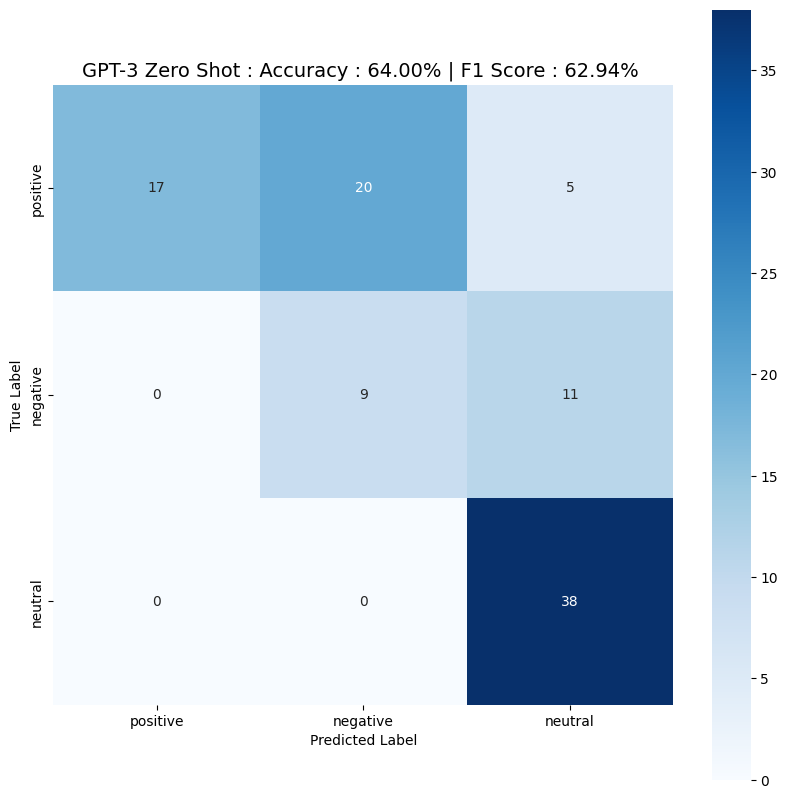

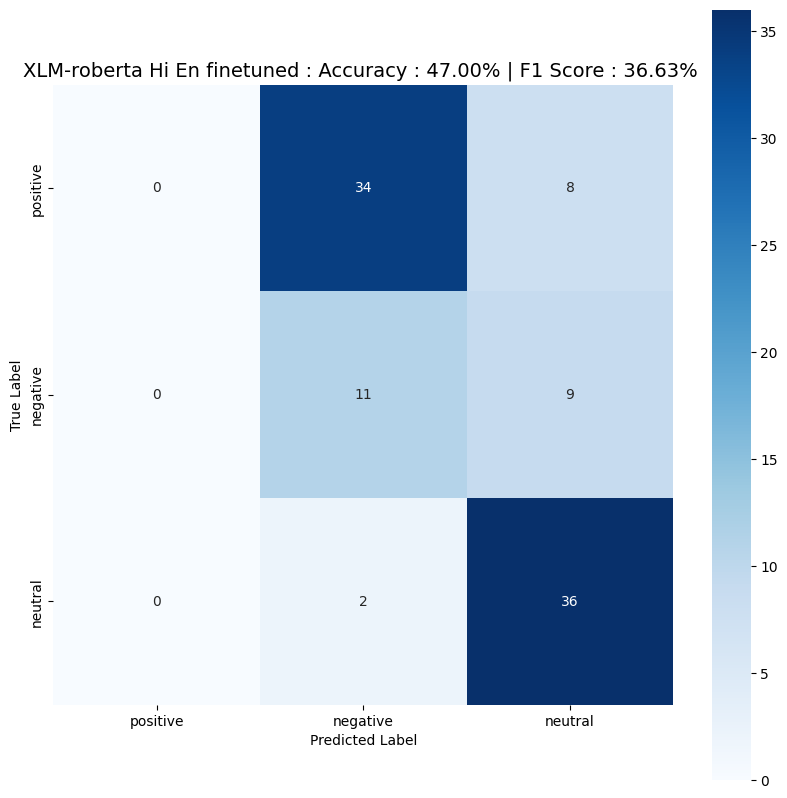

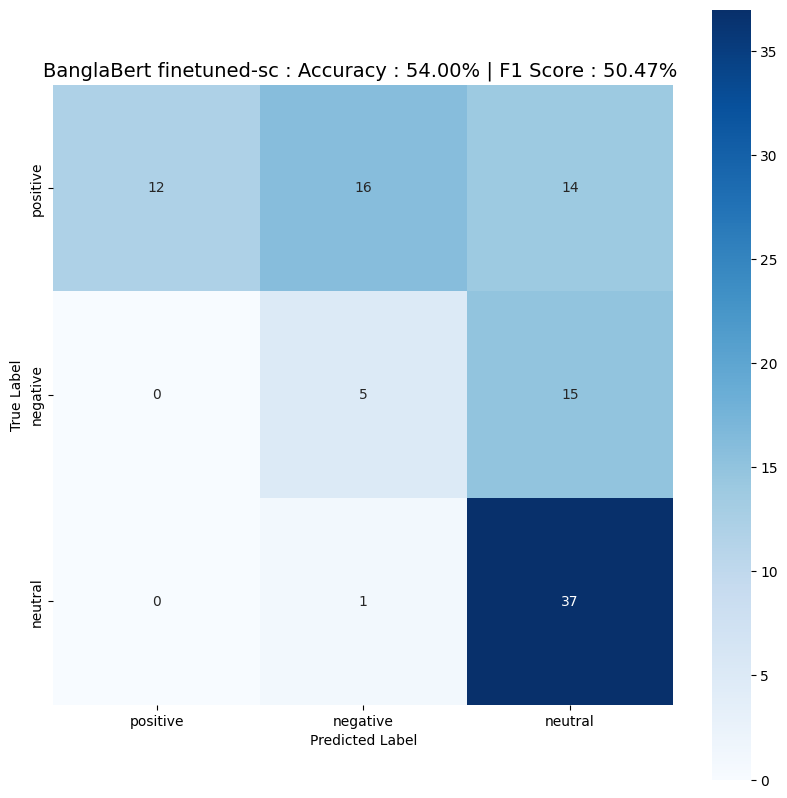

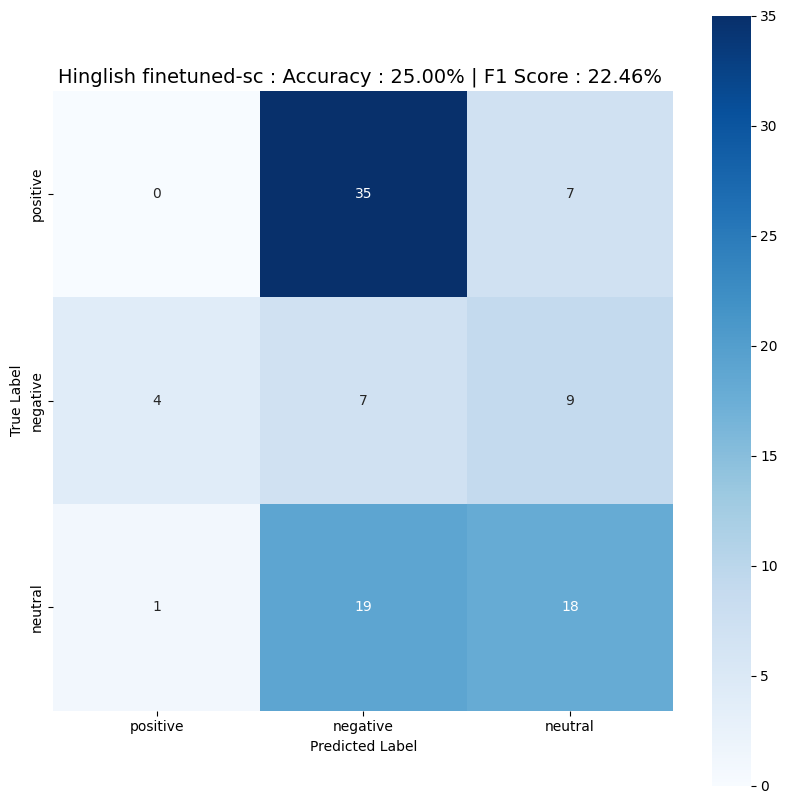

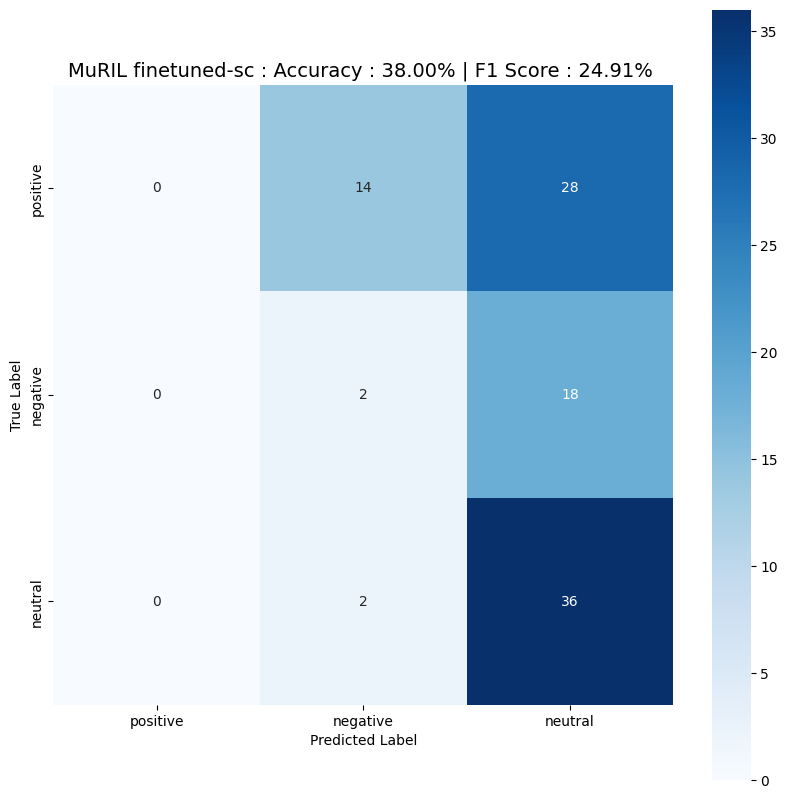

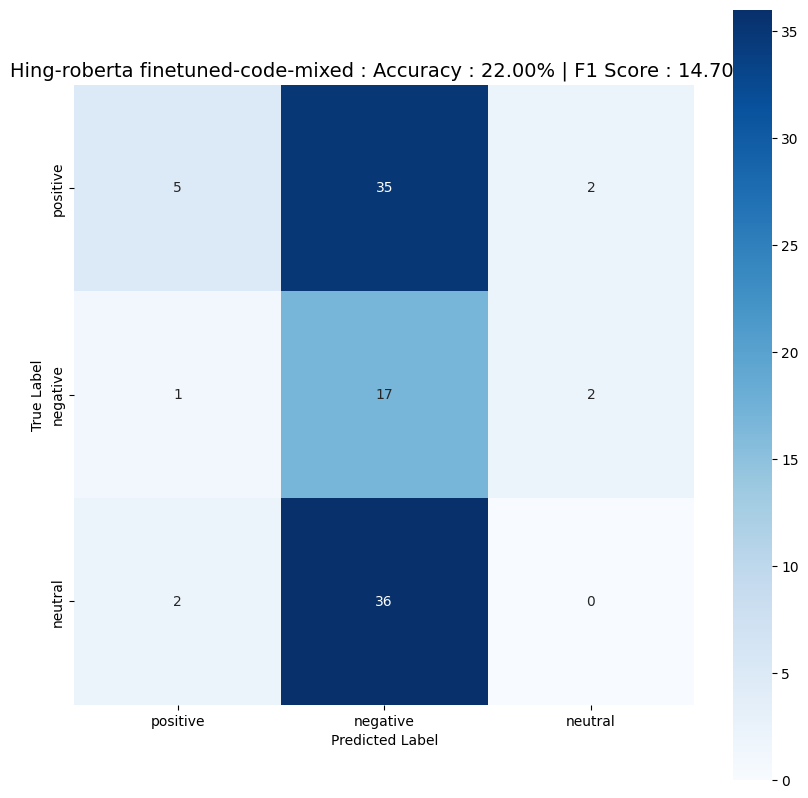

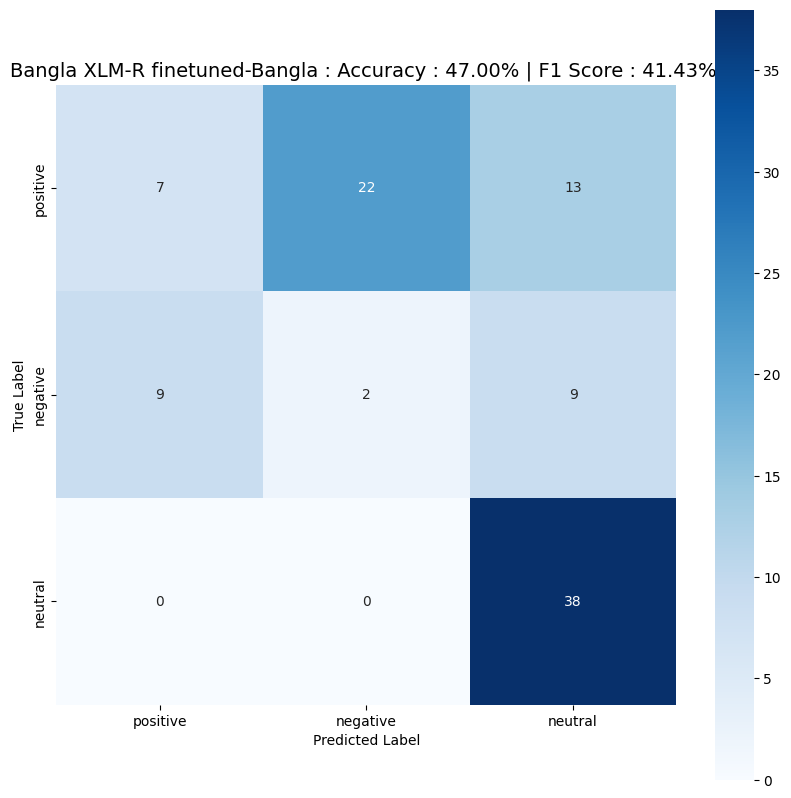

In [6]:
from sklearn import metrics

for k in models.keys():
    print(f'**Model {k}**')
    print(metrics.classification_report(
        predicted['actual_class'], predicted[f'pred_{k}']))
    print('-----------------------------------------------------------')
    confusionMatrixAndAccuracyReport(
        predicted['actual_class'], predicted[f'pred_{k}'], ['positive', 'negative','neutral'], title=k)
    print('-----------------------------------------------------------')

In [7]:
from sklearn import metrics

perf_metrics = []

for k in models.keys():
    print(f'{k} Model')
    perf_metrics.append({
        "Model": k,
        "Accuracy": metrics.accuracy_score(predicted['actual_class'], predicted[f'pred_{k}']),
        "F1 Score": metrics.f1_score(predicted['actual_class'], predicted[f'pred_{k}'], average='weighted'),
        "Precision": metrics.precision_score(predicted['actual_class'], predicted[f'pred_{k}'], average='weighted'),
        "Recall": metrics.recall_score(predicted['actual_class'], predicted[f'pred_{k}'], average='weighted'),
       #"ROC AUC Score": metrics.roc_auc_score(predicted['actual_class'], predicted[f'pred_{k}'])
    })

GPT-3 Zero Shot Model
XLM-roberta Hi En finetuned Model
BanglaBert finetuned-sc Model
Hinglish finetuned-sc Model
MuRIL finetuned-sc Model
Hing-roberta finetuned-code-mixed Model
Bangla XLM-R finetuned-Bangla Model


c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
perf_metrics_df = pd.DataFrame(perf_metrics)
perf_metrics_df

,Model,Accuracy,F1 Score,Precision,Recall
0,GPT-3 Zero Shot,0.64,0.629416,0.749476,0.64
1,XLM-roberta Hi En finetuned,0.47,0.366331,0.304922,0.47
2,BanglaBert finetuned-sc,0.54,0.504670,0.678485,0.54
3,Hinglish finetuned-sc,0.25,0.224568,0.224127,0.25
4,MuRIL finetuned-sc,0.38,0.249053,0.189051,0.38
5,Hing-roberta finetuned-code-mixed,0.22,0.146963,0.301136,0.22
6,Bangla XLM-R finetuned-Bangla,0.47,0.414255,0.441083,0.47


In [9]:
perf_metrics_df.to_csv('../results/perf_metrics_models.csv', index=False)
print(perf_metrics_df.to_markdown(index=False))

| Model                             |   Accuracy |   F1 Score |   Precision |   Recall |
|:----------------------------------|-----------:|-----------:|------------:|---------:|
| GPT-3 Zero Shot                   |       0.64 |   0.629416 |    0.749476 |     0.64 |
| XLM-roberta Hi En finetuned       |       0.47 |   0.366331 |    0.304922 |     0.47 |
| BanglaBert finetuned-sc           |       0.54 |   0.50467  |    0.678485 |     0.54 |
| Hinglish finetuned-sc             |       0.25 |   0.224568 |    0.224127 |     0.25 |
| MuRIL finetuned-sc                |       0.38 |   0.249053 |    0.189051 |     0.38 |
| Hing-roberta finetuned-code-mixed |       0.22 |   0.146963 |    0.301136 |     0.22 |
| Bangla XLM-R finetuned-Bangla     |       0.47 |   0.414255 |    0.441083 |     0.47 |
